********
## Table of Contents
<br>
<ol>
    <ol>
        <h2>1. <a href='#1' style="text-decoration : none; color : #000000;"> 50:50 Uninfected:Infected Users</a></h2>
        <ol>
            <ul> <h3> 1.1 <a href='#1.1' style="text-decoration : none; color : #000000;"> Random State 0</a></h3></ul>
            <ul> <h3> 1.2 <a href='#1.2' style="text-decoration : none; color : #000000;"> Random State 10</a></h3></ul>
            <ul> <h3> 1.3 <a href='#1.3' style="text-decoration : none; color : #000000;"> Random State 20</a></h3></ul>
        </ol>  
     </ol>
    <br>
    <ol>
        <h2>2. <a href='#2' style="text-decoration : none; color : #000000;"> 70:30 Uninfected:Infected Users</a></h2>
        <ol>
            <ul> <h3> 2.1 <a href='#2.1' style="text-decoration : none; color : #000000;"> Random State 0</a></h3></ul>
            <ul> <h3> 2.2 <a href='#2.2' style="text-decoration : none; color : #000000;"> Random State 10</a></h3></ul>
            <ul> <h3> 2.3 <a href='#2.3' style="text-decoration : none; color : #000000;"> Random State 20</a></h3></ul>
        </ol>  
     </ol>
</ol>

In [102]:
### Import Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_columns",80)

from IPython.display import HTML


from sklearn.metrics import confusion_matrix,accuracy_score,log_loss,classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. <a id='1' style="text-decoration : none; color : #000000;"> 50:50 Uninfected:Infected Users</a>

### 1.1  <a id='1.1' style="text-decoration : none; color : #000000;"> </a>Random State 0

In [103]:
z=pd.read_csv('../Collecting logs and Building Feature Set/Feature_Vector_50_50_2_27_random_state_0.csv',index_col='Source_User')

print("Infected/Uninfected Users")
z.Target.value_counts()

Infected/Uninfected Users


infected      2481
uninfected    2481
Name: Target, dtype: int64

### Feature Set

In [104]:
### Build our feature set
X=z.iloc[:,z.columns!='Target']

### Feature Code
X.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]
columns=X.columns
X.head(2)

NREC        PAR  \
Source_User                                                           
21f9a46d094a0039eac8b09f38e2a760d7977c809ec91a1...     4    1.00000   
705f5e8c54520cba59aa4307a315b09f35dd4138efb687c...  9326  236.40564   

                                                           PAS        LEN  \
Source_User                                                                 
21f9a46d094a0039eac8b09f38e2a760d7977c809ec91a1...    1.000000  31.000000   
705f5e8c54520cba59aa4307a315b09f35dd4138efb687c...  130.825005  78.920437   

                                                             BYS  \
Source_User                                                        
21f9a46d094a0039eac8b09f38e2a760d7977c809ec91a1...     77.500000   
705f5e8c54520cba59aa4307a315b09f35dd4138efb687c...  16523.837122   

                                                              BYR      SP  \
Source_User                                                                 
21f9a46d094a0039eac8b09f38e2a760d7977c809ec91a1...     225.750000     4.0   
705f5e8c54520cba59aa4307a315b09f35dd4138efb687c...  308234.733219  7070.0   

                                                      DP  NAPP  SIP   DIP  \
Source_User                                                                 
21f9a46d094a0039eac8b09f38e2a760d7977c809ec91a1...   1.0     1    1     1   
705f5e8c54520cba59aa4307a315b09f35dd4138efb687c...  26.0    47   74  1610   

                                                          TDIF  0000  0100  \
Source_User                                                                  
21f9a46d094a0039eac8b09f38e2a760d7977c809ec91a1...    0.250000     0     0   
705f5e8c54520cba59aa4307a315b09f35dd4138efb687c...  796.853957   528   582   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
21f9a46d094a0039eac8b09f38e2a760d7977c809ec91a1...     0     0     0     0   
705f5e8c54520cba59aa4307a315b09f35dd4138efb687c...   519   540   512   417   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
21f9a46d094a0039eac8b09f38e2a760d7977c809ec91a1...     0     0     0     0   
705f5e8c54520cba59aa4307a315b09f35dd4138efb687c...   421   626   360   346   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
21f9a46d094a0039eac8b09f38e2a760d7977c809ec91a1...     0     0     0     0   
705f5e8c54520cba59aa4307a315b09f35dd4138efb687c...   223   308   207   272   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
21f9a46d094a0039eac8b09f38e2a760d7977c809ec91a1...     0     0     0     0   
705f5e8c54520cba59aa4307a315b09f35dd4138efb687c...   844   136   298   175   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
21f9a46d094a0039eac8b09f38e2a760d7977c809ec91a1...     0     0     4     0   
705f5e8c54520cba59aa4307a315b09f35dd4138efb687c...   259   359   259   323   

                                                    2200  2300  
Source_User                                                     
21f9a46d094a0039eac8b09f38e2a760d7977c809ec91a1...     0     0  
705f5e8c54520cba59aa4307a315b09f35dd4138efb687c...   397   415

In [105]:
### Store the labels ['Infected','Uninfected'] in a separate frame to analyze the clusters later
target=z.Target.reset_index(drop=True)

### Scaled X

In [106]:
### Retain the original data and column names
orig_X=X.copy()
## Create a new feature set and scale it using Standard Scaler
X=X.values
scaler_X=StandardScaler()
scaler_X.fit(X)
scaled_X=scaler_X.transform(X)
scaled_X[0:2]

array([[-0.76722642, -0.52058634, -0.53181811, -0.57487063, -0.31007205,
        -0.48698037, -0.95649782, -0.1294763 , -1.84909968, -1.39025043,
        -0.8324506 , -0.24741103, -0.62107818, -0.56752353, -0.54092086,
        -0.52074019, -0.49738857, -0.46468394, -0.48670552, -0.54249685,
        -0.6176302 , -0.67371785, -0.7461569 , -0.68850099, -0.76830831,
        -0.77846596, -0.68028727, -0.76551211, -0.75197338, -0.68150648,
        -0.6697773 , -0.65429627, -0.65108666, -0.63425701, -0.58200684,
        -0.64064324],
       [ 1.14636874,  0.27705702,  0.38711128, -0.19763212,  0.02261476,
         0.31497435,  1.31089806, -0.06731048,  0.67345179,  0.53402518,
         0.87578589, -0.2342902 ,  1.22693736,  1.19143591,  1.02344405,
         1.09229731,  0.99231262,  0.70671029,  0.84070332,  1.74853054,
         0.99093392,  1.01629545,  0.57029958,  0.86852242,  0.43897925,
         0.82320768,  3.63757424,  0.01816612,  0.8128905 ,  0.10543168,
         0.4120809 ,  0.78466

In [107]:
### Function get_purity will take as input the labels predicted by the algorithm and use them to analyze the purity of clusters
def get_purity(labels):
    d=pd.DataFrame(labels).join(target)
    d.columns=['Cluster_Labels','Target']
    d=d.groupby(['Cluster_Labels','Target']).agg({'Target':len}).unstack().fillna(0).transpose()
    q=d.apply(lambda x: x/x.sum()*100,axis=0)
    mt=d.append(q)
    mt=mt.xs('Target')
    a=[]
    for i in range(0,len(mt.index)):
        if i==0:
            a.append(mt.index[i]+"#")
        if i==1:
            a.append(mt.index[i]+"#")
        if i==2:
            a.append(mt.index[i]+"%")
        if i==3:
            a.append(mt.index[i]+"%")
    mt.index=a
    display(mt.round(2))
   
  
### Function get_kmeans will take as input, data and apply kmeans on it for k=1 to 5
### The function will then store the sum of sqaure of distances for each value of k and plot an elbow plot
def get_kmeans(data):
    distortions=[]
    for i in range(1,5):
        kmeanModel=KMeans(n_clusters=i,random_state=0)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)
        get_purity(kmeanModel.labels_)
        print("Sum of square of distances is:",kmeanModel.inertia_)
        print("\n---------------------------------------------------------------------------------------------------------\n")
        print("---------------------------------------------------------------------------------------------------------\n")
    plt.plot(np.arange(1,5), distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances ')
    plt.title('The Elbow Method showing the optimal value of k')
    plt.show()
    print("The minimum sum of sqaures of distances is :",min(distortions)," for k",distortions.index(min(distortions))+1)
    return kmeanModel

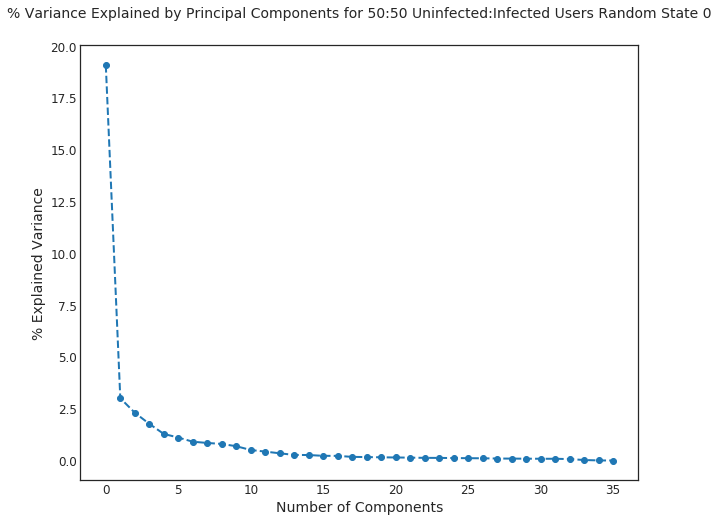

In [108]:
### Plot the scree plot to analyze the number of components to be selected for PCA

sns.set_style('white')
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components for 50:50 Uninfected:Infected Users Random State 0',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


In [109]:
pca_explained_variance_50_0=pca.explained_variance_

In [110]:
### Analyze how each of the origunal component contributes to explain the variance using the decided number of components
pca=PCA(n_components=13,random_state=0)
X_pca1_13=pca.fit_transform(scaled_X)
print("Table for components of PCA when using 13 components with explained variance of",sum(pca.explained_variance_ratio_))
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12','PC-13'])
m

Table for components of PCA when using 13 components with explained variance of 0.918903941373


NREC       PAR       PAS       LEN       BYS       BYR        SP  \
PC-1   0.227471  0.020224  0.012497 -0.004621  0.007039  0.020395  0.213826   
PC-2  -0.008228  0.555836  0.553346 -0.006990  0.277524  0.540356  0.014144   
PC-3   0.051441 -0.024934 -0.031344  0.099592 -0.020179 -0.023594  0.047675   
PC-4   0.028629 -0.000139 -0.015324  0.036705 -0.047772  0.003251 -0.066378   
PC-5  -0.001984  0.043537  0.061897  0.491945  0.020284  0.039472 -0.137432   
PC-6   0.055462  0.042996  0.028865 -0.366871 -0.040422  0.047804 -0.012312   
PC-7   0.003913 -0.228386  0.083735  0.019421  0.897771 -0.312771 -0.003442   
PC-8  -0.023197 -0.006104  0.009234 -0.762629  0.048258 -0.008873 -0.062996   
PC-9  -0.025456  0.026180 -0.023150  0.100255 -0.129496  0.036417  0.105490   
PC-10  0.014959 -0.017866  0.014603  0.130216  0.084309 -0.026355  0.055162   
PC-11  0.000571 -0.004963 -0.011628 -0.027905  0.010458 -0.004832  0.042210   
PC-12  0.003380  0.001251  0.009403 -0.008791  0.011087 -0.001411 -0.006101   
PC-13  0.023124 -0.001734  0.005652 -0.010675 -0.010880  0.000858 -0.082004   

             DP      NAPP       SIP       DIP      TDIF      0000      0100  \
PC-1   0.073845  0.176085  0.105011  0.198212 -0.045034  0.195790  0.179359   
PC-2  -0.019898  0.055545  0.036106  0.002549 -0.041586  0.004086  0.013135   
PC-3   0.225930 -0.064023 -0.099881  0.118661  0.045153  0.021779  0.146968   
PC-4  -0.033630 -0.093473 -0.185105 -0.032436  0.099182  0.227444  0.253408   
PC-5   0.514912 -0.284104 -0.353639  0.176697  0.355070 -0.066796 -0.121901   
PC-6  -0.391631 -0.243254 -0.389220 -0.251698  0.544740 -0.012281 -0.029317   
PC-7  -0.030253  0.010527  0.088380 -0.021872  0.150156  0.014190  0.019192   
PC-8   0.493979 -0.021774 -0.092397  0.235858  0.046010 -0.016266 -0.003016   
PC-9  -0.048895  0.238047  0.457463  0.061401  0.699630  0.073993  0.120303   
PC-10 -0.241642 -0.096279 -0.406736 -0.103936 -0.197159  0.094520  0.182356   
PC-11  0.100324  0.034985 -0.103469  0.102347 -0.023367  0.283840  0.287861   
PC-12  0.051176 -0.036379  0.022314 -0.021872 -0.003078 -0.062014 -0.026472   
PC-13  0.020364 -0.133661  0.186885 -0.038722 -0.029594  0.022639 -0.153833   

           0200      0300      0400      0500      0600      0700      0800  \
PC-1   0.175844  0.168605  0.168794  0.160572  0.158078  0.155868  0.162946   
PC-2   0.022636  0.023813  0.017405  0.008806  0.000945 -0.014312 -0.021784   
PC-3   0.245400  0.350559  0.375921  0.373139  0.330766  0.172966  0.042424   
PC-4   0.239895  0.143737  0.053758 -0.049870 -0.172207 -0.345565 -0.391162   
PC-5  -0.113047 -0.100778 -0.071447 -0.052661 -0.033843  0.013522  0.024835   
PC-6  -0.018043 -0.005832  0.048026  0.094467  0.139635  0.185647  0.173037   
PC-7   0.009621 -0.000554  0.003067  0.009824  0.010270  0.003084 -0.008996   
PC-8   0.001719  0.029622 -0.007585 -0.037594 -0.079246 -0.132249 -0.134066   
PC-9   0.080448  0.054497 -0.013121 -0.059693 -0.107007 -0.157813 -0.103907   
PC-10  0.140114  0.123387  0.042870 -0.016448 -0.089811 -0.230796 -0.149975   
PC-11  0.087037 -0.071716 -0.166273 -0.285085 -0.276559  0.168837  0.289596   
PC-12  0.020097  0.085650  0.079210  0.040659 -0.062774 -0.082160  0.044027   
PC-13 -0.239432 -0.162226  0.002271  0.271798  0.299711 -0.149698 -0.121152   

           0900      1000      1100      1200      1300      1400      1500  \
PC-1   0.171559  0.181269  0.173781  0.184909  0.196387  0.178949  0.200019   
PC-2  -0.025432 -0.024841 -0.024540 -0.026587 -0.026305 -0.027800 -0.024453   
PC-3  -0.062126 -0.114955 -0.110842 -0.151799 -0.137583 -0.177381 -0.158047   
PC-4  -0.343992 -0.274158 -0.212995 -0.159937 -0.058982 -0.007899  0.055038   
PC-5   0.062670  0.078882  0.094899  0.059034  0.066718  0.054621  0.054164   
PC-6   0.117319  0.018940 -0.032883 -0.025317 -0.004423  0.029746 -0.000997   
PC-7  -0.009103 -0.031539 -0.029971 -0.024786 -0.005902 -0.012896 -0.001115   
PC-8  -0.060457  0.068761  0.156198  0.095299  0.052974 -0

In [111]:
pca_inv_data_50_0=pca.components_
pca_data_50_0=m

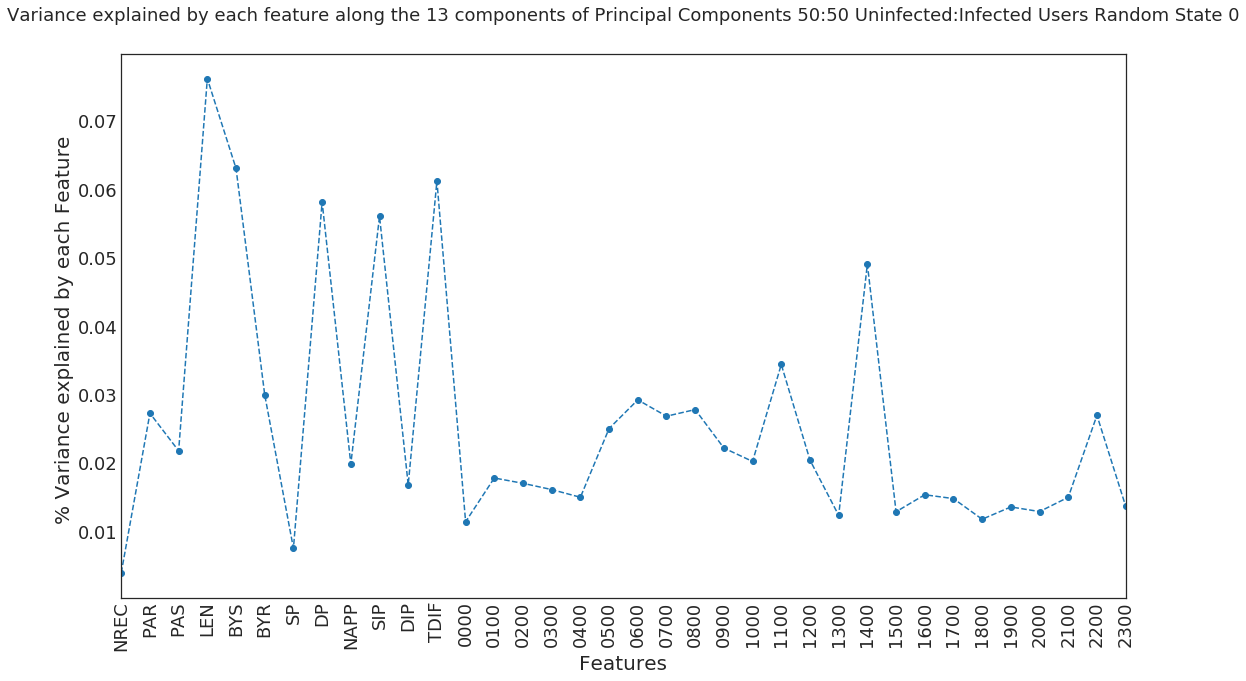

In [112]:
pca_inv_data = pca.components_

### Plot the variance explained by each feature for the decided number of components of PCA
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.title('Variance explained by each feature along the 13 components of Principal Components 50:50 Uninfected:Infected Users Random State 0',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('B.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

### For the rest of part 1,i.e. for 50:50 Infected and Uninfected Users split we apply Kmeans for differnet combinations of data which include scaled data, PCA with Scaled data using differnet number of components and analyze not only the sum of square of distances but also the cluster purity based on the ground truth.

### K-Means

Kmeans on data


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 7.62550325053e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0     1
infected#       2473.0   8.0
uninfected#     2473.0   8.0
infected%         50.0  50.0
uninfected%       50.0  50.0

Sum of square of distances is: 4.15910448218e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1       2
infected#       2355.00   3.00  123.00
uninfected#     2406.00   6.00   69.00
infected%         49.46  33.33   64.06
uninfected%       50.54  66.67   35.94

Sum of square of distances is: 2.49957685503e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2     3
infected#       2351.00    0.0  125.0   5.0
uninfected#     2405.00    1.0   70.0   5.0
infected%         49.43    0.0   64.1  50.0
uninfected%       50.57  100.0   35.9  50.0

Sum of square of distances is: 1.63844849665e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



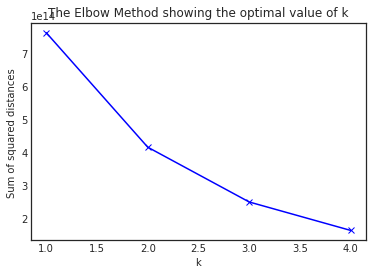

The minimum sum of sqaures of distances is : 1.63844849665e+14  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [113]:
print("Kmeans on data")
get_kmeans(X)

### K-Means on scaled data

Kmeans on scaled data


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 178632.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1260.00  1221.00
uninfected#     2255.00   226.00
infected%         35.85    84.38
uninfected%       64.15    15.62

Sum of square of distances is: 127168.486915

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1       2
infected#        814.00  153.00  1514.0
uninfected#     2123.00   12.00   346.0
infected%         27.72   92.73    81.4
uninfected%       72.28    7.27    18.6

Sum of square of distances is: 107389.539257

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1      2       3
infected#        577.00  520.00  45.00  1339.0
uninfected#     2002.00   62.00   1.00   416.0
infected%         22.37   89.35  97.83    76.3
uninfected%       77.63   10.65   2.17    23.7

Sum of square of distances is: 98518.1619421

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



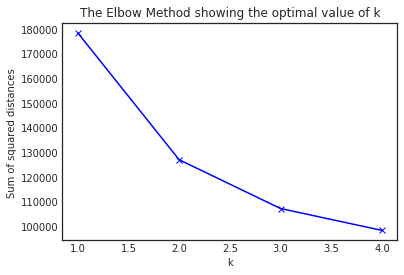

The minimum sum of sqaures of distances is : 98518.1619421  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [114]:
print("Kmeans on scaled data")
get_kmeans(scaled_X)

### PCA using 3 components on scaled data

The explained variance for pca applied on scaled data is 0.677293259135 using 3 components
Kmeans on sclaed data with PCA using 3 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 14883.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1068.00  1413.00
uninfected#     2184.00   297.00
infected%         32.84    82.63
uninfected%       67.16    17.37

Sum of square of distances is: 12125.27388

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1        2
infected#       1041.00  179.00  1261.00
uninfected#     2140.00   27.00   314.00
infected%         32.73   86.89    80.06
uninfected%       67.27   13.11    19.94

Sum of square of distances is: 9760.13767322

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1       2        3
infected#       1096.00  13.00  180.00  1192.00
uninfected#     2167.00  17.00   27.00   270.00
infected%         33.59  43.33   86.96    81.53
uninfected%       66.41  56.67   13.04    18.47

Sum of square of distances is: 7478.03752411

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



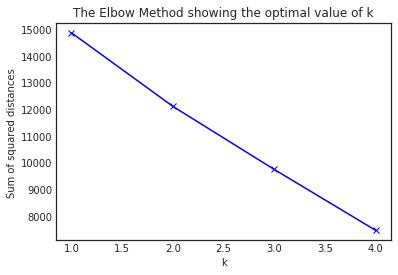

The minimum sum of sqaures of distances is : 7478.03752411  for k 4


In [115]:
pca=PCA(n_components=3,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 3 components")
print("Kmeans on sclaed data with PCA using 3 components:")
model=get_kmeans(X_pca_scaled)

### PCA on scaled data using 4 components

The explained variance for pca applied on scaled data is 0.72648495119 using 4 components
Kmeans on sclaed data with PCA using 4 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 19844.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1
infected#       1056.00  1425.0
uninfected#     2166.00   315.0
infected%         32.77    81.9
uninfected%       67.23    18.1

Sum of square of distances is: 17064.3804658

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2
infected#       1149.00  185.0  1147.00
uninfected#     2152.00   25.0   304.00
infected%         34.81   88.1    79.05
uninfected%       65.19   11.9    20.95

Sum of square of distances is: 14639.2435473

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1       2      3
infected#       1255.0  185.00  1028.0  13.00
uninfected#     2183.0   24.00   257.0  17.00
infected%         36.5   88.52    80.0  43.33
uninfected%       63.5   11.48    20.0  56.67

Sum of square of distances is: 12344.2096835

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



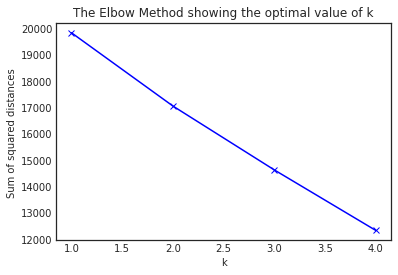

The minimum sum of sqaures of distances is : 12344.2096835  for k 4


In [116]:
### PCA on scaled data using 4 components
pca=PCA(n_components=4,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_4=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 4 components")
print("Kmeans on sclaed data with PCA using 4 components:")
model=get_kmeans(X_pca_scaled_4)

### PCA on scaled data using 5 components

The explained variance for pca applied on scaled data is 0.762116026864 using 5 components
Kmeans on sclaed data with PCA using 5 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 24805.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1690.00   791.00
uninfected#      407.00  2074.00
infected%         80.59    27.61
uninfected%       19.41    72.39

Sum of square of distances is: 21881.2787953

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1      2
infected#        796.0  1661.00  24.00
uninfected#     2057.0   401.00  23.00
infected%         27.9    80.55  51.06
uninfected%       72.1    19.45  48.94

Sum of square of distances is: 19388.6431048

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2       3
infected#       1330.00  13.00   881.00  257.00
uninfected#      361.00  17.00  2066.00   37.00
infected%         78.65  43.33    29.89   87.41
uninfected%       21.35  56.67    70.11   12.59

Sum of square of distances is: 17173.1583581

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



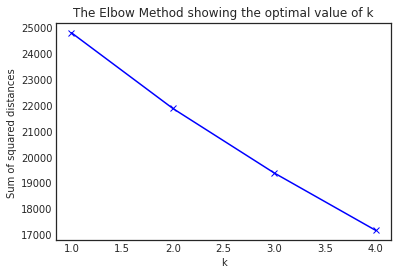

The minimum sum of sqaures of distances is : 17173.1583581  for k 4


In [117]:
### PCA on scaled data using 5 components
pca=PCA(n_components=5,whiten=True,random_state=0)
X_pca_scaled_5=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 5 components")
print("Kmeans on sclaed data with PCA using 5 components:")
model=get_kmeans(X_pca_scaled_5)

### PCA on scaled data using 6 components

The explained variance for pca applied on scaled data is 0.792937417831 using 6 components
Kmeans on sclaed data with PCA using 6 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 29766.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0     1
infected#       2458.00  23.0
uninfected#     2464.00  17.0
infected%         49.94  57.5
uninfected%       50.06  42.5

Sum of square of distances is: 26634.4804373

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2
infected#       1890.00  22.00   569.00
uninfected#      532.00  17.00  1932.00
infected%         78.03  56.41    22.75
uninfected%       21.97  43.59    77.25

Sum of square of distances is: 23690.8424163

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2      3
infected#        635.00  1811.00  13.00  22.00
uninfected#     1985.00   462.00  17.00  17.00
infected%         24.24    79.67  43.33  56.41
uninfected%       75.76    20.33  56.67  43.59

Sum of square of distances is: 21305.1027275

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



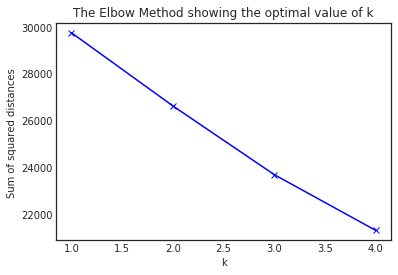

The minimum sum of sqaures of distances is : 21305.1027275  for k 4


In [118]:
### PCA on scaled data using 6 components
pca=PCA(n_components=6,whiten=True,random_state=0)
X_pca_scaled_6=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 6 components")
print("Kmeans on sclaed data with PCA using 6 components:")
model=get_kmeans(X_pca_scaled_6)

### PCA on scaled data using 9 components

The explained variance for pca applied on scaled data is 0.863945691289 using 9 components
Kmeans on sclaed data with PCA using 9 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 44649.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#        550.00  1931.00
uninfected#     1822.00   659.00
infected%         23.19    74.56
uninfected%       76.81    25.44

Sum of square of distances is: 41322.2154903

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#        541.00  1940.00    0.0
uninfected#     1827.00   642.00   12.0
infected%         22.85    75.14    0.0
uninfected%       77.15    24.86  100.0

Sum of square of distances is: 38308.0469671

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2      3
infected#        543.00  1935.00    0.0   3.00
uninfected#     1830.00   634.00   13.0   4.00
infected%         22.88    75.32    0.0  42.86
uninfected%       77.12    24.68  100.0  57.14

Sum of square of distances is: 35342.1082783

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



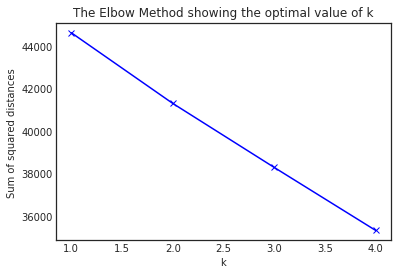

The minimum sum of sqaures of distances is : 35342.1082783  for k 4


In [119]:
### PCA on scaled data using 9 components
pca=PCA(n_components=9,whiten=True,random_state=0)
X_pca_scaled_9=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 9 components")
print("Kmeans on sclaed data with PCA using 9 components:")
model=get_kmeans(X_pca_scaled_9)

### PCA on scaled data using 11 components

The explained variance for pca applied on scaled data is 0.897246550855 using 11 components
Kmeans on sclaed data with PCA using 11 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 54571.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1
infected#        512.00  1969.0
uninfected#     1807.00   674.0
infected%         22.08    74.5
uninfected%       77.92    25.5

Sum of square of distances is: 51179.4057679

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2
infected#        508.00  24.00  1949.00
uninfected#     1741.00  17.00   723.00
infected%         22.59  58.54    72.94
uninfected%       77.41  41.46    27.06

Sum of square of distances is: 47958.9056807

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2        3
infected#        555.00   3.00    0.0  1923.00
uninfected#     1828.00   4.00   12.0   637.00
infected%         23.29  42.86    0.0    75.12
uninfected%       76.71  57.14  100.0    24.88

Sum of square of distances is: 45079.5381961

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



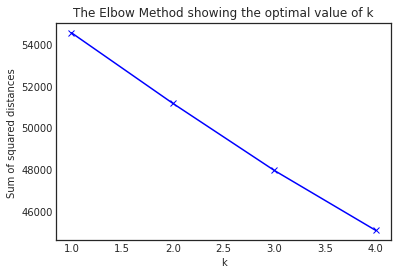

The minimum sum of sqaures of distances is : 45079.5381961  for k 4


In [120]:
### PCA on scaled data using 11 components
pca=PCA(n_components=11,whiten=True,random_state=0)
X_pca_scaled_11=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 11 components")
print("Kmeans on sclaed data with PCA using 11 components:")
model=get_kmeans(X_pca_scaled_11)

### PCA on scaled data using 12 components

The explained variance for pca applied on scaled data is 0.909204815304 using 12 components
Kmeans on sclaed data with PCA using 12 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 59532.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1983.00   498.00
uninfected#      699.00  1782.00
infected%         73.94    21.84
uninfected%       26.06    78.16

Sum of square of distances is: 56139.1422229

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0     1        2
infected#        517.00  21.0  1943.00
uninfected#     1817.00   4.0   660.00
infected%         22.15  84.0    74.64
uninfected%       77.85  16.0    25.36

Sum of square of distances is: 53132.4831847

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2      3
infected#        526.00    1.0  1954.00    0.0
uninfected#     1810.00    0.0   659.00   12.0
infected%         22.52  100.0    74.78    0.0
uninfected%       77.48    0.0    25.22  100.0

Sum of square of distances is: 50054.5896872

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



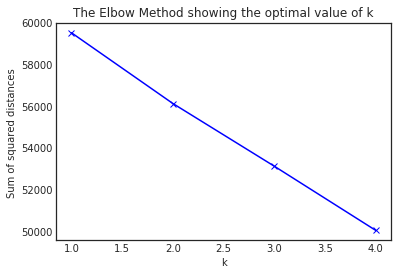

The minimum sum of sqaures of distances is : 50054.5896872  for k 4


In [121]:
### PCA on scaled data using 12 components
pca=PCA(n_components=12,whiten=True,random_state=0)
X_pca_scaled_12=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 12 components")
print("Kmeans on sclaed data with PCA using 12 components:")
model=get_kmeans(X_pca_scaled_12)

### PCA on scaled data using 13 components

The explained variance for pca applied on scaled data is 0.918903941373 using 13 components
Kmeans on sclaed data with PCA using 13 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 64493.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1
infected#        496.00  1985.0
uninfected#     1780.00   701.0
infected%         21.79    73.9
uninfected%       78.21    26.1

Sum of square of distances is: 61086.6172246

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1      2
infected#       1983.0   497.00    1.0
uninfected#      726.0  1755.00    0.0
infected%         73.2    22.07  100.0
uninfected%       26.8    77.93    0.0

Sum of square of distances is: 57867.7914504

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1     2      3
infected#        489.00  1966.00  21.0   5.00
uninfected#     1772.00   701.00   4.0   4.00
infected%         21.63    73.72  84.0  55.56
uninfected%       78.37    26.28  16.0  44.44

Sum of square of distances is: 55079.2817888

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



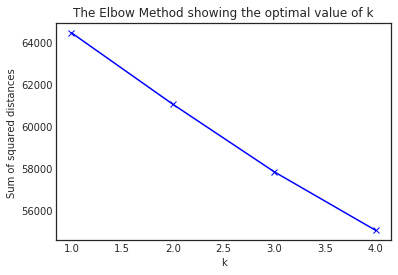

The minimum sum of sqaures of distances is : 55079.2817888  for k 4


In [122]:
### PCA on scaled data using 13 components
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_scaled_13=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 13 components")
print("Kmeans on sclaed data with PCA using 13 components:")
model=get_kmeans(X_pca_scaled_13)

### 1.2  <a id='1.2' style="text-decoration : none; color : #000000;"> Random State 10</a>

In [123]:
z=pd.read_csv('../Collecting logs and Building Feature Set/Feature_Vector_50_50_2_27_random_state_10.csv',index_col='Source_User')
print("Infected/Uninfected Users")
z.Target.value_counts()

Infected/Uninfected Users


infected      2481
uninfected    2481
Name: Target, dtype: int64

### Feature Set

In [124]:
### Build our feature set
X=z.iloc[:,z.columns!='Target']
X.head(2)

Count  Packets Received  \
Source_User                                                                   
0d3fc59664e46c2fd425f7e198ccedc1faaffc4ae160fc7...    558         87.706093   
384ed706777916e315308d41eb2efc086edc768b6392e14...      3         29.333333   

                                                    Packets Sent  \
Source_User                                                        
0d3fc59664e46c2fd425f7e198ccedc1faaffc4ae160fc7...     25.094982   
384ed706777916e315308d41eb2efc086edc768b6392e14...     22.000000   

                                                    Elapsed_Time   Bytes_sent  \
Source_User                                                                     
0d3fc59664e46c2fd425f7e198ccedc1faaffc4ae160fc7...    106.747312  3436.492832   
384ed706777916e315308d41eb2efc086edc768b6392e14...    363.000000  5405.333333   

                                                    Bytes_received  \
Source_User                                                          
0d3fc59664e46c2fd425f7e198ccedc1faaffc4ae160fc7...   103496.745520   
384ed706777916e315308d41eb2efc086edc768b6392e14...     3980.666667   

                                                    Source_Port  \
Source_User                                                       
0d3fc59664e46c2fd425f7e198ccedc1faaffc4ae160fc7...        539.0   
384ed706777916e315308d41eb2efc086edc768b6392e14...          3.0   

                                                    Destination_Port  \
Source_User                                                            
0d3fc59664e46c2fd425f7e198ccedc1faaffc4ae160fc7...              20.0   
384ed706777916e315308d41eb2efc086edc768b6392e14...               1.0   

                                                    Application  Source_IP  \
Source_User                                                                  
0d3fc59664e46c2fd425f7e198ccedc1faaffc4ae160fc7...           42         47   
384ed706777916e315308d41eb2efc086edc768b6392e14...            2          1   

                                                    Destination_IP  \
Source_User                                                          
0d3fc59664e46c2fd425f7e198ccedc1faaffc4ae160fc7...             230   
384ed706777916e315308d41eb2efc086edc768b6392e14...               2   

                                                    Received_Time_diff  0  1  \
Source_User                                                                    
0d3fc59664e46c2fd425f7e198ccedc1faaffc4ae160fc7...         7309.743728  5  4   
384ed706777916e315308d41eb2efc086edc768b6392e14...            0.000000  0  0   

                                                    2  3  4  5  6   7   8  9  \
Source_User                                                                    
0d3fc59664e46c2fd425f7e198ccedc1faaffc4ae160fc7...  0  0  0  0  4  31  14  3   
384ed706777916e315308d41eb2efc086edc768b6392e14...  0  0  0  0  0   0   0  3   

                                                    10  11  12  13  14  15  \
Source_User                                                                  
0d3fc59664e46c2fd425f7e198ccedc1faaffc4ae160fc7...   3   4  16  18  20  74   
384ed706777916e315308d41eb2efc086edc768b6392e14...   0   0   0   0   0   0   

                                                    16  17   18  19  20  21  \
Source_User                                                                   
0d3fc59664e46c2fd425f7e198ccedc1faaffc4ae160fc7...  81  71  116  42  32  10   
384ed706777916e315308d41eb2efc086edc768b6392e14...   0   0    0   0   0   0   

                                                    22  23  
Source_User                                                 
0d3fc59664e46c2fd425f7e198ccedc1faaffc4ae160fc7...   4   6  
384ed706777916e315308d41eb2efc086edc768b6392e14...   0   0

In [125]:
### Store the labels ['Infected','Uninfected'] in a separate frame to analyze the clusters later
target=z.Target.reset_index(drop=True)

### Scaled X

In [126]:
### Retain the original data and column names
orig_X=X.copy()
## Create a new feature set and scale it using Standard Scaler
X=X.values
scaler_X=StandardScaler()
scaler_X.fit(X)
scaled_X=scaler_X.transform(X)
scaled_X[0:2]

array([[-0.63112006, -0.20256385, -0.32886349,  0.05475132, -0.13812827,
        -0.20222741, -0.77393496, -0.07364012,  0.39858126, -0.18760307,
        -0.58061178, -0.11924609, -0.59375147, -0.55110276, -0.53650637,
        -0.50710088, -0.47836105, -0.46198125, -0.44287258, -0.41897851,
        -0.54776504, -0.66566998, -0.71969664, -0.65284591, -0.66709502,
        -0.66679144, -0.57088303, -0.33573864, -0.31567661, -0.35825535,
        -0.18393521, -0.48018894, -0.52186727, -0.58511534, -0.55957033,
        -0.60816379],
       [-0.74066052, -0.3690507 , -0.34834367,  2.98879179, -0.11843965,
        -0.42924762, -0.9436382 , -0.1155362 , -1.79734414, -1.39090704,
        -0.82053069, -0.22168609, -0.61086075, -0.56299101, -0.53650637,
        -0.50710088, -0.47836105, -0.46198125, -0.45433402, -0.53110782,
        -0.60988136, -0.66566998, -0.73708153, -0.67255255, -0.7604264 ,
        -0.77231027, -0.67204461, -0.7581881 , -0.73177304, -0.67447754,
        -0.66007736, -0.64455

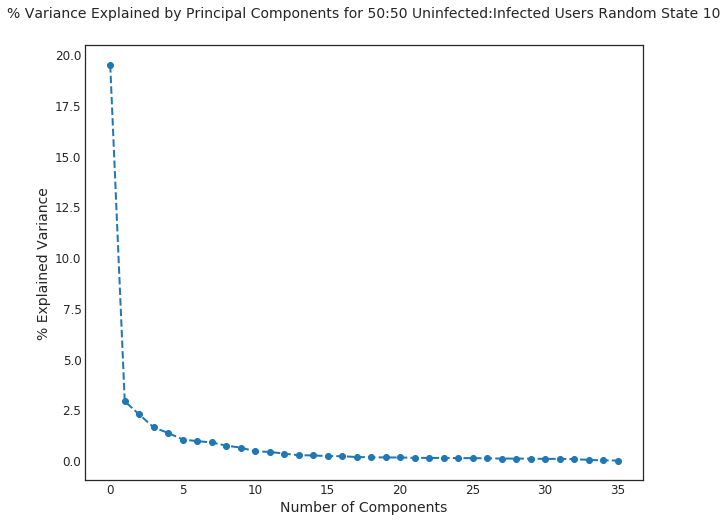

In [127]:
### Plot the scree plot to analyze the number of components to be selected for PCA

sns.set_style('white')
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components for 50:50 Uninfected:Infected Users Random State 10',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


In [128]:
pca_explained_variance_50_10=pca.explained_variance_

In [129]:
### Analyze how each of the origunal component contributes to explain the variance using the decided number of components
pca=PCA(n_components=13,random_state=0)
X_pca1_13=pca.fit_transform(scaled_X)
print("Table for components of PCA when using 13 components with explained variance of",sum(pca.explained_variance_ratio_))
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12','PC-13'])
m

Table for components of PCA when using 13 components with explained variance of 0.920248168257


Count  Packets Received  Packets Sent  Elapsed_Time  Bytes_sent  \
PC-1   0.225067          0.013555      0.007989     -0.003359    0.001793   
PC-2  -0.005679          0.555964      0.544505      0.038709    0.342653   
PC-3   0.053785         -0.010185     -0.017229      0.132833   -0.020834   
PC-4   0.035779         -0.006597     -0.023646      0.002551   -0.040904   
PC-5   0.001561          0.015897      0.043236      0.483654    0.032200   
PC-6  -0.051676         -0.034238     -0.028117      0.471472   -0.043040   
PC-7   0.003403         -0.277392      0.214438     -0.046648    0.807370   
PC-8  -0.003204         -0.033332     -0.002124      0.437413    0.010070   
PC-9  -0.029000          0.029249     -0.014125     -0.521693   -0.011847   
PC-10  0.011449         -0.018065      0.018246      0.229002    0.029240   
PC-11  0.006080          0.008064      0.002657      0.036612   -0.012595   
PC-12 -0.000017          0.006425     -0.002518     -0.021754    0.004240   
PC-13  0.038137          0.003474      0.013227      0.021365   -0.020167   

       Bytes_received  Source_Port  Destination_Port  Application  Source_IP  \
PC-1         0.014355     0.210318          0.084220     0.171307   0.099396   
PC-2         0.515888     0.012673         -0.019025     0.046379   0.030712   
PC-3        -0.005999     0.030398          0.237673    -0.099697  -0.138378   
PC-4         0.001614    -0.042951         -0.125916    -0.088553  -0.179215   
PC-5         0.008450    -0.158919          0.430315    -0.301337  -0.366240   
PC-6        -0.026626     0.007372          0.385156     0.240488   0.404498   
PC-7        -0.464726    -0.018683          0.035779    -0.017575   0.039345   
PC-8        -0.037169     0.146945         -0.396825     0.210027   0.415559   
PC-9         0.032637     0.007694          0.330863     0.115591   0.149420   
PC-10       -0.026357     0.096053         -0.292651    -0.059003  -0.405639   
PC-11        0.010412    -0.038129         -0.143237    -0.063789   0.051359   
PC-12        0.004866     0.001729          0.107841    -0.009381   0.006718   
PC-13        0.006798    -0.170332          0.001847    -0.278825   0.345370   

       Destination_IP  Received_Time_diff         0         1         2  \
PC-1         0.196918           -0.038953  0.194984  0.178509  0.175940   
PC-2         0.003813           -0.029073  0.005678  0.011446  0.018019   
PC-3         0.101202            0.068290  0.012625  0.124938  0.223973   
PC-4        -0.067739            0.100059  0.234264  0.279363  0.270241   
PC-5         0.115737            0.433649 -0.051446 -0.117601 -0.120331   
PC-6         0.269849           -0.414046  0.023450  0.051787  0.047332   
PC-7         0.001302           -0.013161  0.006956  0.015256  0.016908   
PC-8        -0.099347            0.601499  0.051106  0.080436  0.058725   
PC-9         0.211109            0.464629  0.046751  0.106699  0.079670   
PC-10       -0.087010           -0.198098  0.131729  0.236442  0.159182   
PC-11       -0.152715           -0.001269 -0.294411 -0.217647  0.020006   
PC-12        0.027757            0.002361 -0.009059  0.009749  0.025357   
PC-13       -0.217173           -0.043562  0.052183 -0.125645 -0.156733   

              3         4         5         6         7         8         9  \
PC-1   0.170265  0.171641  0.168515  0.159083  0.162539  0.166904  0.175844   
PC-2   0.017063  0.009741  0.002742 -0.006765 -0.014436 -0.020364 -0.020770   
PC-3   0.337102  0.371241  0.369651  0.339113  0.200160  0.064462 -0.067544   
PC-4   0.160265  0.063817 -0.026241 -0.168269 -0.303927 -0.367336 -0.323057   
PC-5  -0.112830 -0.074889 -0.061668 -0.042553 -0.024722 -0.011203  0.036719   
PC-6   0.025621 -0.034297 -0.084487 -0.158743 -0.202017 -0.198862 -0.121684   
PC-7   0.015910  0.012965  0.013315  0.002927 -0.014403 -0.021970 -0.022092   
PC-8   0.013741 -0.013064 -0.009777 -0.011885  0.023247  0.060459  0.045364   
PC-9   0.089614  0.004110 -0.059846 -0.150151 -0

In [130]:
pca_inv_data_50_10=pca.components_
pca_data_50_10=m

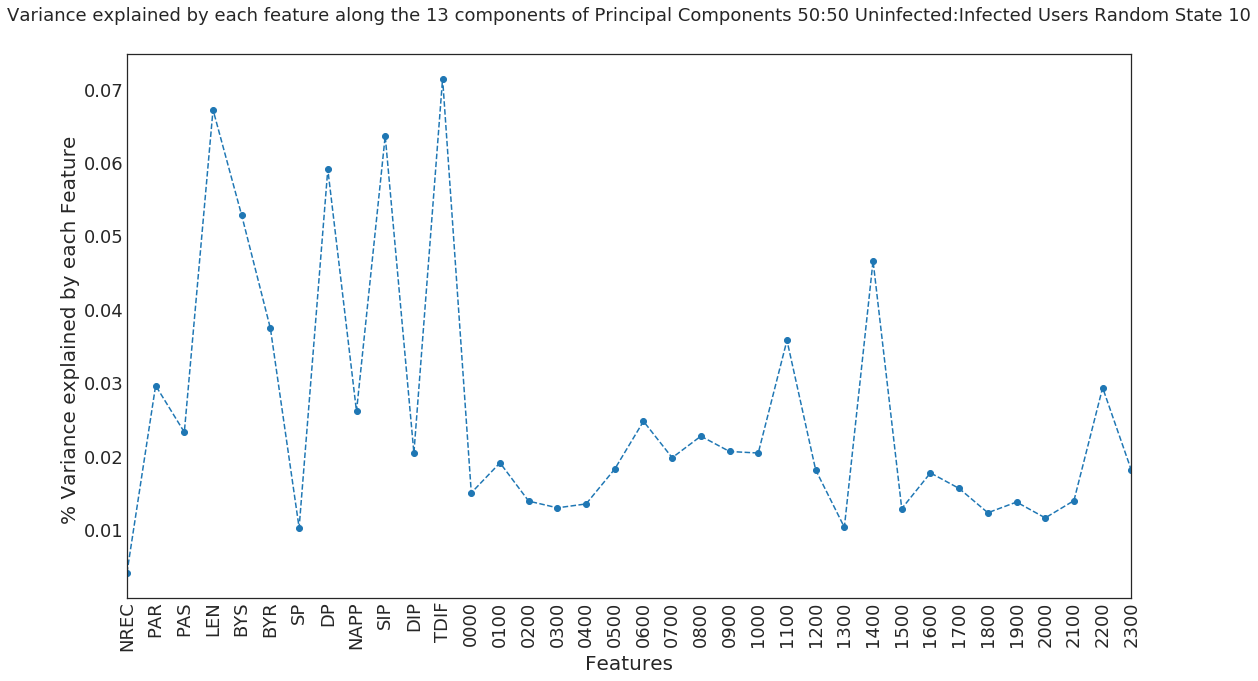

In [131]:
pca_inv_data = pca.components_

### Plot the variance explained by each feature for the decided number of components of PCA
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.title('Variance explained by each feature along the 13 components of Principal Components 50:50 Uninfected:Infected Users Random State 10',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('B.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

### For the rest of part 1,i.e. for 50:50 Infected and Uninfected Users split we apply Kmeans for differnet combinations of data which include scaled data, PCA with Scaled data using differnet number of components and analyze not only the sum of square of distances but also the cluster purity based on the ground truth.

### K-Means

Kmeans on data


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 1.02856167811e+15

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       2472.00   9.00
uninfected#     2464.00  17.00
infected%         50.08  34.62
uninfected%       49.92  65.38

Sum of square of distances is: 6.02212665029e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       2453.00    0.0  28.00
uninfected#     2449.00    1.0  31.00
infected%         50.04    0.0  47.46
uninfected%       49.96  100.0  52.54

Sum of square of distances is: 3.23881975522e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0     1       2      3
infected#       2209.00   9.0  263.00    0.0
uninfected#     2330.00  16.0  134.00    1.0
infected%         48.67  36.0   66.25    0.0
uninfected%       51.33  64.0   33.75  100.0

Sum of square of distances is: 2.00551105262e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



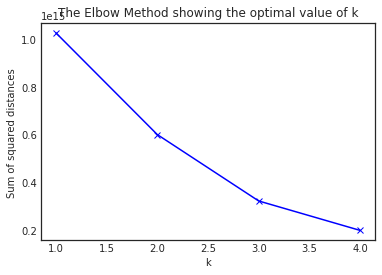

The minimum sum of sqaures of distances is : 2.00551105262e+14  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [132]:
print("Kmeans on data")
get_kmeans(X)

### K-Means on scaled data

Kmeans on scaled data


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 178632.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1312.00  1169.00
uninfected#     2291.00   190.00
infected%         36.41    86.02
uninfected%       63.59    13.98

Sum of square of distances is: 127901.75719

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1        2
infected#        854.00  111.00  1516.00
uninfected#     2165.00    8.00   308.00
infected%         28.29   93.28    83.11
uninfected%       71.71    6.72    16.89

Sum of square of distances is: 106968.439462

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1       2     3
infected#       1491.00   734.00  253.00   3.0
uninfected#      360.00  2095.00   25.00   1.0
infected%         80.55    25.95   91.01  75.0
uninfected%       19.45    74.05    8.99  25.0

Sum of square of distances is: 95275.8877258

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



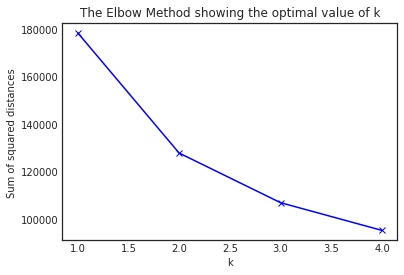

The minimum sum of sqaures of distances is : 95275.8877258  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [133]:
print("Kmeans on scaled data")
get_kmeans(scaled_X)

### PCA using 3 components on scaled data

The explained variance for pca applied on scaled data is 0.685269409564 using 3 components
Kmeans on sclaed data with PCA using 3 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 14883.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1338.00  1143.00
uninfected#      255.00  2226.00
infected%         83.99    33.93
uninfected%       16.01    66.07

Sum of square of distances is: 12223.0719001

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1     2
infected#       1270.00  1204.00   7.0
uninfected#      207.00  2261.00  13.0
infected%         85.99    34.75  35.0
uninfected%       14.01    65.25  65.0

Sum of square of distances is: 9645.17258175

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2     3
infected#       1169.00  168.0  1137.00   7.0
uninfected#     2216.00   26.0   226.00  13.0
infected%         34.53   86.6    83.42  35.0
uninfected%       65.47   13.4    16.58  65.0

Sum of square of distances is: 7390.3866774

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



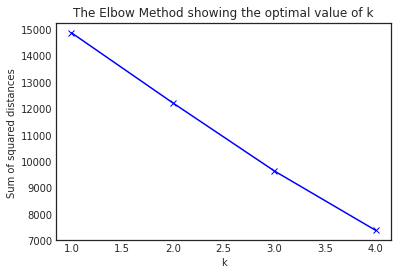

The minimum sum of sqaures of distances is : 7390.3866774  for k 4


In [134]:
pca=PCA(n_components=3,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 3 components")
print("Kmeans on sclaed data with PCA using 3 components:")
model=get_kmeans(X_pca_scaled)

### PCA on scaled data using 4 components

The explained variance for pca applied on scaled data is 0.730528535538 using 4 components
Kmeans on sclaed data with PCA using 4 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 19844.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1063.00  1418.00
uninfected#     2200.00   281.00
infected%         32.58    83.46
uninfected%       67.42    16.54

Sum of square of distances is: 17173.0827899

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1     2
infected#       269.00  2205.0   7.0
uninfected#      41.00  2427.0  13.0
infected%        86.77    47.6  35.0
uninfected%      13.23    52.4  65.0

Sum of square of distances is: 14578.3081463

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1       2     3
infected#       1325.00  956.00  193.00   7.0
uninfected#     2219.00  221.00   28.00  13.0
infected%         37.39   81.22   87.33  35.0
uninfected%       62.61   18.78   12.67  65.0

Sum of square of distances is: 12225.0980055

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



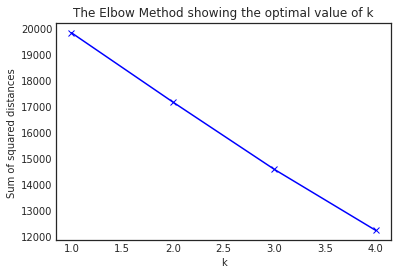

The minimum sum of sqaures of distances is : 12225.0980055  for k 4


In [135]:
### PCA on scaled data using 4 components
pca=PCA(n_components=4,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_4=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 4 components")
print("Kmeans on sclaed data with PCA using 4 components:")
model=get_kmeans(X_pca_scaled_4)

### PCA on scaled data using 5 components

The explained variance for pca applied on scaled data is 0.768282146634 using 5 components
Kmeans on sclaed data with PCA using 5 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 24805.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1
infected#       1679.00   802.0
uninfected#      388.00  2093.0
infected%         81.23    27.7
uninfected%       18.77    72.3

Sum of square of distances is: 21928.6258634

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1     2
infected#       1659.00   815.00   7.0
uninfected#      360.00  2108.00  13.0
infected%         82.17    27.88  35.0
uninfected%       17.83    72.12  65.0

Sum of square of distances is: 19299.8730258

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1     2      3
infected#        809.00  1649.00   7.0  16.00
uninfected#     2096.00   359.00  13.0  13.00
infected%         27.85    82.12  35.0  55.17
uninfected%       72.15    17.88  65.0  44.83

Sum of square of distances is: 16937.7859798

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



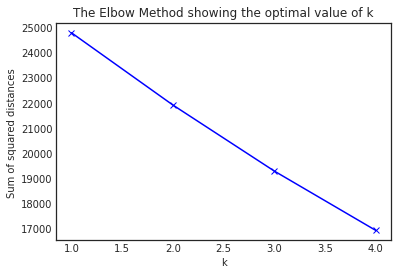

The minimum sum of sqaures of distances is : 16937.7859798  for k 4


In [136]:
### PCA on scaled data using 5 components
pca=PCA(n_components=5,whiten=True,random_state=0)
X_pca_scaled_5=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 5 components")
print("Kmeans on sclaed data with PCA using 5 components:")
model=get_kmeans(X_pca_scaled_5)

### PCA on scaled data using 6 components

The explained variance for pca applied on scaled data is 0.797055222586 using 6 components
Kmeans on sclaed data with PCA using 6 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 29766.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#        555.00  1926.00
uninfected#     1932.00   549.00
infected%         22.32    77.82
uninfected%       77.68    22.18

Sum of square of distances is: 26794.380347

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0     1       2
infected#       1842.00  21.0   618.0
uninfected#      493.00   9.0  1979.0
infected%         78.89  70.0    23.8
uninfected%       21.11  30.0    76.2

Sum of square of distances is: 23839.5920096

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2     3
infected#       1933.00   519.00  22.00   7.0
uninfected#      579.00  1881.00   8.00  13.0
infected%         76.95    21.62  73.33  35.0
uninfected%       23.05    78.38  26.67  65.0

Sum of square of distances is: 21330.5173434

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



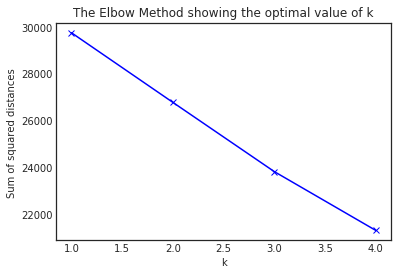

The minimum sum of sqaures of distances is : 21330.5173434  for k 4


In [137]:
### PCA on scaled data using 6 components
pca=PCA(n_components=6,whiten=True,random_state=0)
X_pca_scaled_6=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 6 components")
print("Kmeans on sclaed data with PCA using 6 components:")
model=get_kmeans(X_pca_scaled_6)

### PCA on scaled data using 9 components

The explained variance for pca applied on scaled data is 0.868741893023 using 9 components
Kmeans on sclaed data with PCA using 9 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 44649.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       2479.00   2.00
uninfected#     2476.00   5.00
infected%         50.03  28.57
uninfected%       49.97  71.43

Sum of square of distances is: 41262.1304642

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#       1922.00   557.00   2.00
uninfected#      620.00  1856.00   5.00
infected%         75.61    23.08  28.57
uninfected%       24.39    76.92  71.43

Sum of square of distances is: 37931.8792676

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0     1        2      3
infected#        561.00  21.0  1897.00   2.00
uninfected#     1856.00   9.0   611.00   5.00
infected%         23.21  70.0    75.64  28.57
uninfected%       76.79  30.0    24.36  71.43

Sum of square of distances is: 34917.1490199

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



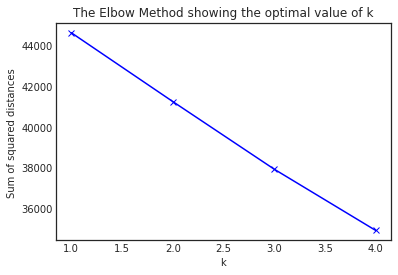

The minimum sum of sqaures of distances is : 34917.1490199  for k 4


In [138]:
### PCA on scaled data using 9 components
pca=PCA(n_components=9,whiten=True,random_state=0)
X_pca_scaled_9=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 9 components")
print("Kmeans on sclaed data with PCA using 9 components:")
model=get_kmeans(X_pca_scaled_9)

### PCA on scaled data using 11 components

The explained variance for pca applied on scaled data is 0.898970802928 using 11 components
Kmeans on sclaed data with PCA using 11 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 54571.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       2479.00   2.00
uninfected#     2476.00   5.00
infected%         50.03  28.57
uninfected%       49.97  71.43

Sum of square of distances is: 51182.8943138

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#       1948.00   531.00   2.00
uninfected#      697.00  1779.00   5.00
infected%         73.65    22.99  28.57
uninfected%       26.35    77.01  71.43

Sum of square of distances is: 47814.4644139

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2      3
infected#       1923.00   545.00    0.0  13.00
uninfected#      646.00  1827.00    7.0   1.00
infected%         74.85    22.98    0.0  92.86
uninfected%       25.15    77.02  100.0   7.14

Sum of square of distances is: 44836.3016069

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



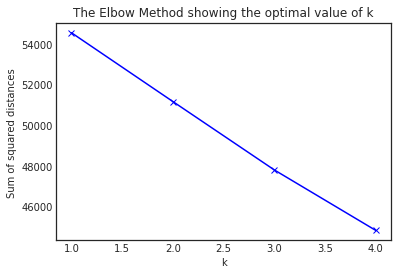

The minimum sum of sqaures of distances is : 44836.3016069  for k 4


In [139]:
### PCA on scaled data using 11 components
pca=PCA(n_components=11,whiten=True,random_state=0)
X_pca_scaled_11=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 11 components")
print("Kmeans on sclaed data with PCA using 11 components:")
model=get_kmeans(X_pca_scaled_11)

### PCA on scaled data using 12 components

The explained variance for pca applied on scaled data is 0.910792430566 using 12 components
Kmeans on sclaed data with PCA using 12 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 59532.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       2479.00   2.00
uninfected#     2476.00   5.00
infected%         50.03  28.57
uninfected%       49.97  71.43

Sum of square of distances is: 56143.7574317

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#        542.00  1939.00    0.0
uninfected#     1779.00   695.00    7.0
infected%         23.35    73.61    0.0
uninfected%       76.65    26.39  100.0

Sum of square of distances is: 52832.0851137

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1      2      3
infected#       1923.00   531.0  25.00   2.00
uninfected#      664.00  1788.0  24.00   5.00
infected%         74.33    22.9  51.02  28.57
uninfected%       25.67    77.1  48.98  71.43

Sum of square of distances is: 49789.440944

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



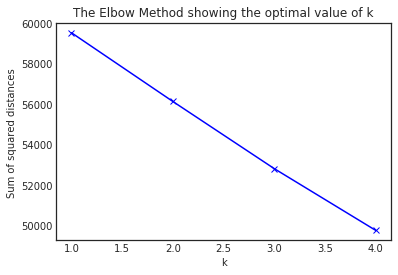

The minimum sum of sqaures of distances is : 49789.440944  for k 4


In [140]:
### PCA on scaled data using 12 components
pca=PCA(n_components=12,whiten=True,random_state=0)
X_pca_scaled_12=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 12 components")
print("Kmeans on sclaed data with PCA using 12 components:")
model=get_kmeans(X_pca_scaled_12)

### PCA on scaled data using 13 components

The explained variance for pca applied on scaled data is 0.920248168257 using 13 components
Kmeans on sclaed data with PCA using 13 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 64493.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1977.00   504.00
uninfected#      677.00  1804.00
infected%         74.49    21.84
uninfected%       25.51    78.16

Sum of square of distances is: 61088.0445091

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2
infected#       1986.00   2.00   493.00
uninfected#      692.00   5.00  1784.00
infected%         74.16  28.57    21.65
uninfected%       25.84  71.43    78.35

Sum of square of distances is: 57701.2813596

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0     1      2       3
infected#       1952.00  24.0   2.00   503.0
uninfected#      669.00  24.0   5.00  1783.0
infected%         74.48  50.0  28.57    22.0
uninfected%       25.52  50.0  71.43    78.0

Sum of square of distances is: 54740.5744513

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



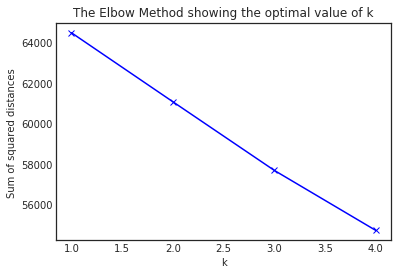

The minimum sum of sqaures of distances is : 54740.5744513  for k 4


In [141]:
### PCA on scaled data using 13 components
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_scaled_13=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 13 components")
print("Kmeans on sclaed data with PCA using 13 components:")
model=get_kmeans(X_pca_scaled_13)

### 1.3  <a id='1.3' style="text-decoration : none; color : #000000;"> Random State 20</a>

In [142]:
z=pd.read_csv('../Collecting logs and Building Feature Set/Feature_Vector_50_50_2_27_random_state_20.csv',index_col='Source_User')
print("Infected/Uninfected Users")
z.Target.value_counts()

Infected/Uninfected Users


infected      2481
uninfected    2481
Name: Target, dtype: int64

### Feature Set

In [143]:
### Build our feature set
X=z.iloc[:,z.columns!='Target']
X.head(2)

Count  Packets Received  \
Source_User                                                                   
1da09acf8ddc082a297329856e8512e0aa25eef1650894f...   3728        132.185891   
24bcdf55cc1168a34c9d7534d7fb24500219538e85f2b8d...     81         31.061728   

                                                    Packets Sent  \
Source_User                                                        
1da09acf8ddc082a297329856e8512e0aa25eef1650894f...    103.969421   
24bcdf55cc1168a34c9d7534d7fb24500219538e85f2b8d...     25.246914   

                                                    Elapsed_Time   Bytes_sent  \
Source_User                                                                     
1da09acf8ddc082a297329856e8512e0aa25eef1650894f...    135.190987  8652.968348   
24bcdf55cc1168a34c9d7534d7fb24500219538e85f2b8d...    109.395062  3871.506173   

                                                    Bytes_received  \
Source_User                                                          
1da09acf8ddc082a297329856e8512e0aa25eef1650894f...   178992.604882   
24bcdf55cc1168a34c9d7534d7fb24500219538e85f2b8d...    17973.666667   

                                                    Source_Port  \
Source_User                                                       
1da09acf8ddc082a297329856e8512e0aa25eef1650894f...       3096.0   
24bcdf55cc1168a34c9d7534d7fb24500219538e85f2b8d...         80.0   

                                                    Destination_Port  \
Source_User                                                            
1da09acf8ddc082a297329856e8512e0aa25eef1650894f...             264.0   
24bcdf55cc1168a34c9d7534d7fb24500219538e85f2b8d...               3.0   

                                                    Application  Source_IP  \
Source_User                                                                  
1da09acf8ddc082a297329856e8512e0aa25eef1650894f...           44        114   
24bcdf55cc1168a34c9d7534d7fb24500219538e85f2b8d...           10         12   

                                                    Destination_IP  \
Source_User                                                          
1da09acf8ddc082a297329856e8512e0aa25eef1650894f...             784   
24bcdf55cc1168a34c9d7534d7fb24500219538e85f2b8d...              28   

                                                    Received_Time_diff   0  \
Source_User                                                                  
1da09acf8ddc082a297329856e8512e0aa25eef1650894f...         2041.380633  72   
24bcdf55cc1168a34c9d7534d7fb24500219538e85f2b8d...        88488.987654   1   

                                                     1    2    3    4    5  \
Source_User                                                                  
1da09acf8ddc082a297329856e8512e0aa25eef1650894f...  81  115  106  131  116   
24bcdf55cc1168a34c9d7534d7fb24500219538e85f2b8d...   0    0    0    0    0   

                                                      6    7    8    9   10  \
Source_User                                                                   
1da09acf8ddc082a297329856e8512e0aa25eef1650894f...  100  355  279  152  196   
24bcdf55cc1168a34c9d7534d7fb24500219538e85f2b8d...    0    0    0    0    0   

                                                     11   12   13   14   15  \
Source_User                                                                   
1da09acf8ddc082a297329856e8512e0aa25eef1650894f...  153  135  443  243  195   
24bcdf55cc1168a34c9d7534d7fb24500219538e85f2b8d...    0    0   10    0    1   

                                                     16   17   18   19  20  \
Source_User                                                                  
1da09acf8ddc082a297329856e8512e0aa25eef1650894f...  185  132  152  107  90   
24bcdf55cc1168a34c9d7534d7fb24500219538e85f2b8d...   25   32    2    8   0   

                                                     21  22  23  
Source_User                                                      

In [144]:
### Store the labels ['Infected','Uninfected'] in a separate frame to analyze the clusters later
target=z.Target.reset_index(drop=True)

### Scaled X

In [145]:
### Retain the original data and column names
orig_X=X.copy()
## Create a new feature set and scale it using Standard Scaler
X=X.values
scaler_X=StandardScaler()
scaler_X.fit(X)
scaled_X=scaler_X.transform(X)
scaled_X[0:2]

array([[ -4.97020992e-03,  -2.39411589e-02,  -4.09337833e-04,
          1.60165995e-01,  -3.89199460e-02,  -1.66889220e-02,
          3.31674066e-02,   5.44592088e-01,   4.96157816e-01,
          1.58430520e+00,  -8.25680288e-04,  -2.51078436e-01,
         -3.70797504e-01,  -3.24886651e-01,  -1.94124582e-01,
         -2.04011989e-01,  -1.18130753e-01,  -1.42451308e-01,
         -1.73839099e-01,   7.85909351e-01,   6.32784689e-01,
          8.42248811e-02,   4.09134624e-01,   7.32012250e-02,
          1.31947286e-02,   1.85746797e+00,   5.55548288e-01,
          3.51494779e-01,   2.22673343e-01,  -9.22470991e-02,
         -3.73030089e-02,  -2.27757387e-01,  -3.15382246e-01,
         -2.41265936e-01,  -4.57155238e-01,  -4.80766870e-01],
       [ -7.55245289e-01,  -6.73907581e-02,  -4.43170836e-02,
          2.07978175e-02,  -4.84103474e-02,  -8.12051033e-02,
         -9.41182831e-01,  -1.20660434e-01,  -1.38961746e+00,
         -1.12195775e+00,  -8.14419414e-01,   1.53006313e+00,
       

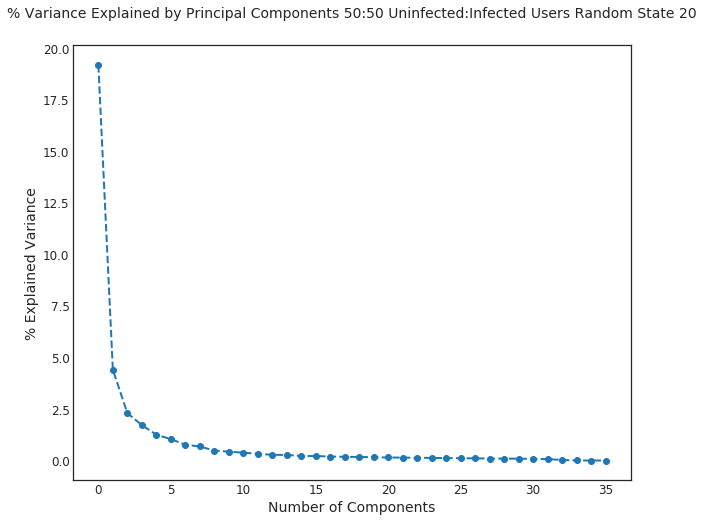

In [146]:
### Plot the scree plot to analyze the number of components to be selected for PCA

sns.set_style('white')
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components 50:50 Uninfected:Infected Users Random State 20',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


In [147]:
pca_explained_variance_50_20=pca.explained_variance_

In [148]:
### Analyze how each of the origunal component contributes to explain the variance using the decided number of components
pca=PCA(n_components=13,random_state=0)
X_pca1_13=pca.fit_transform(scaled_X)
print("Table for components of PCA when using 13 components with explained variance of",sum(pca.explained_variance_ratio_))
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12','PC-13'])
m

Table for components of PCA when using 13 components with explained variance of 0.92323693469


Count  Packets Received  Packets Sent  Elapsed_Time  Bytes_sent  \
PC-1   0.226844         -0.001452     -0.003244     -0.006300   -0.005098   
PC-2   0.003393          0.469173      0.473087      0.420758    0.401817   
PC-3   0.050644         -0.019454     -0.020848      0.022064   -0.017636   
PC-4   0.034598         -0.006044     -0.006602     -0.001102   -0.002527   
PC-5   0.021890         -0.028598     -0.022169      0.061479   -0.006971   
PC-6  -0.053641         -0.021430     -0.024580      0.091221   -0.040952   
PC-7   0.022231         -0.005564     -0.004330      0.014978   -0.015715   
PC-8   0.014563          0.002938      0.005293     -0.025089    0.007479   
PC-9  -0.000643         -0.000752      0.004030     -0.009300    0.014737   
PC-10  0.003365         -0.000563     -0.003105      0.025285   -0.022520   
PC-11 -0.002591         -0.119626      0.032656     -0.494773    0.832805   
PC-12  0.029732         -0.006938     -0.003053      0.013326    0.004093   
PC-13  0.008572         -0.022460     -0.009468      0.043785    0.022919   

       Bytes_received  Source_Port  Destination_Port  Application  Source_IP  \
PC-1        -0.000723     0.213254          0.073397     0.175567   0.104208   
PC-2         0.465131    -0.000266          0.017744    -0.012088  -0.013067   
PC-3        -0.018864     0.047168          0.216692    -0.062857  -0.102411   
PC-4        -0.005879    -0.066893         -0.063100    -0.108386  -0.208054   
PC-5        -0.031368    -0.139821          0.365278    -0.378190  -0.498759   
PC-6        -0.019785    -0.073694          0.743836     0.079420   0.134376   
PC-7        -0.005346    -0.100813          0.016569    -0.200045  -0.388903   
PC-8         0.002129     0.037779         -0.173837    -0.114591  -0.500028   
PC-9        -0.002864    -0.052742         -0.077400    -0.043746   0.107454   
PC-10        0.000592     0.002339          0.080717    -0.025684   0.016472   
PC-11       -0.187894    -0.010877          0.076866     0.019025  -0.019622   
PC-12       -0.008089    -0.127149          0.012824    -0.219620   0.261812   
PC-13       -0.027392    -0.060826          0.026755    -0.155655   0.065184   

       Destination_IP  Received_Time_diff         0         1         2  \
PC-1         0.198248           -0.052888  0.194977  0.177944  0.175598   
PC-2         0.008246            0.001728  0.003764  0.005493  0.008254   
PC-3         0.114553            0.049700  0.023959  0.153773  0.251054   
PC-4        -0.053683            0.127830  0.231615  0.254187  0.245148   
PC-5         0.076016            0.556508 -0.077655 -0.134582 -0.115934   
PC-6         0.373222           -0.317499 -0.012043 -0.011598 -0.009132   
PC-7        -0.074659           -0.683237 -0.103438 -0.165235 -0.103974   
PC-8        -0.079144           -0.292634  0.082713  0.172452  0.126952   
PC-9        -0.115118            0.033309 -0.297504 -0.263529 -0.022164   
PC-10        0.001940           -0.007097 -0.022838  0.011738  0.021455   
PC-11        0.037570           -0.011876 -0.009858 -0.010703 -0.010603   
PC-12       -0.092904           -0.047262 -0.009589 -0.198714 -0.197470   
PC-13       -0.025497           -0.026254  0.208360  0.325678 -0.025552   

              3         4         5         6         7         8         9  \
PC-1   0.168680  0.168407  0.166496  0.157867  0.158880  0.161847  0.178097   
PC-2   0.009443  0.010176  0.009457  0.007024  0.002620 -0.000844 -0.001941   
PC-3   0.353580  0.378907  0.371991  0.327439  0.174214  0.044113 -0.072686   
PC-4   0.141023  0.057833 -0.041926 -0.192562 -0.323526 -0.383984 -0.308589   
PC-5  -0.090816 -0.036746  0.002863  0.042850  0.091590  0.092131  0.100634   
PC-6  -0.011579 -0.060398 -0.104786 -0.176650 -0.203858 -0.205699 -0.093149   
PC-7  -0.075047  0.016691  0.066939  0.147217  0.191996  0.125708  0.009125   
PC-8   0.119995  0.041259 -0.013701 -0.111185 -0.211860 -0.129191  0.046834   
PC-9   0.143164  0.218702  0.237562  0.158669 -0

In [149]:
pca_inv_data_50_20=pca.components_
pca_data_50_20=m

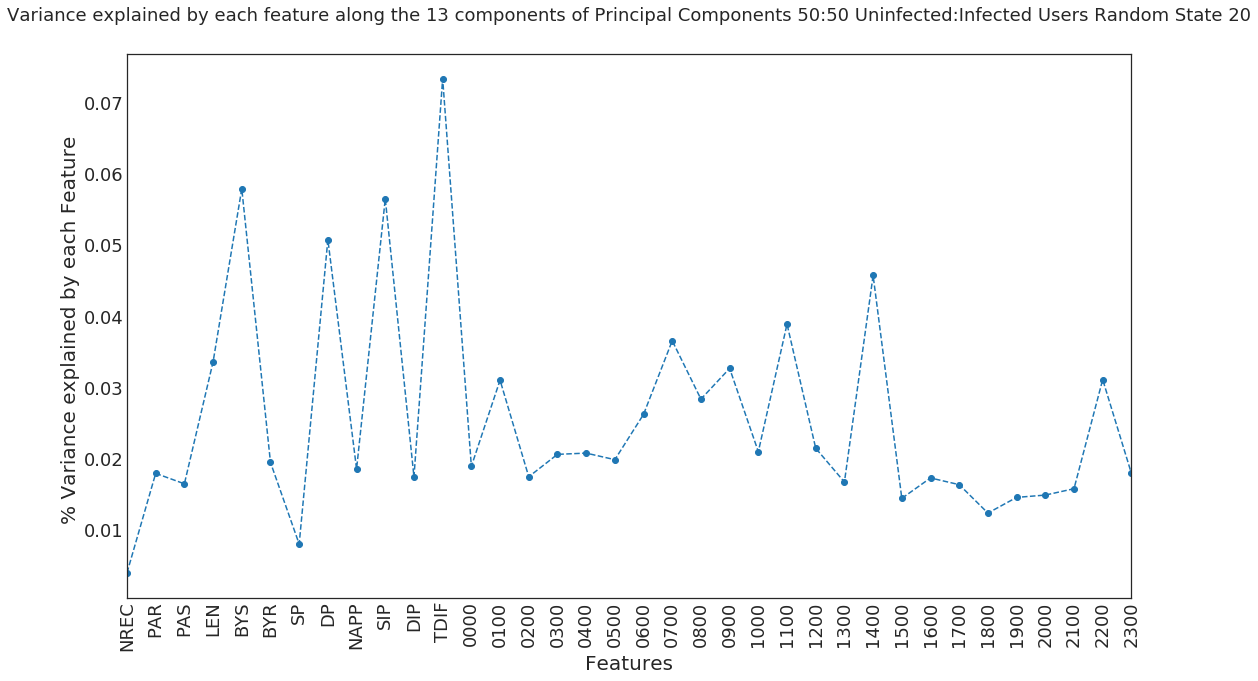

In [150]:
pca_inv_data = pca.components_

### Plot the variance explained by each feature for the decided number of components of PCA
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.title('Variance explained by each feature along the 13 components of Principal Components 50:50 Uninfected:Infected Users Random State 20',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('B.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

### For the rest of part 1,i.e. for 50:50 Infected and Uninfected Users split we apply Kmeans for differnet combinations of data which include scaled data, PCA with Scaled data using differnet number of components and analyze not only the sum of square of distances but also the cluster purity based on the ground truth.

### K-Means

Kmeans on data


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 3.21796165531e+16

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       2481.00    0.0
uninfected#     2480.00    1.0
infected%         50.01    0.0
uninfected%       49.99  100.0

Sum of square of distances is: 1.11108268161e+15

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       2481.00    0.0    0.0
uninfected#     2478.00    1.0    2.0
infected%         50.03    0.0    0.0
uninfected%       49.97  100.0  100.0

Sum of square of distances is: 5.97488758299e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2      3
infected#       2452.00    0.0    0.0  29.00
uninfected#     2450.00    1.0    2.0  28.00
infected%         50.02    0.0    0.0  50.88
uninfected%       49.98  100.0  100.0  49.12

Sum of square of distances is: 3.16729311016e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



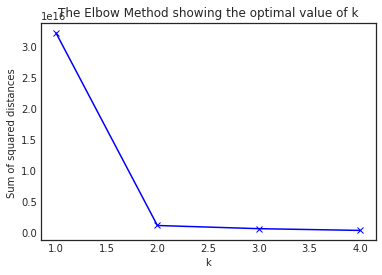

The minimum sum of sqaures of distances is : 3.16729311016e+14  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [151]:
print("Kmeans on data")
get_kmeans(X)

### K-Means on scaled data

Kmeans on scaled data


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 178632.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1286.00  1195.00
uninfected#     2278.00   203.00
infected%         36.08    85.48
uninfected%       63.92    14.52

Sum of square of distances is: 127272.832331

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#       1285.00  1196.00    0.0
uninfected#     2276.00   204.00    1.0
infected%         36.09    85.43    0.0
uninfected%       63.91    14.57  100.0

Sum of square of distances is: 106428.708001

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1        2      3
infected#        844.00  146.00  1491.00    0.0
uninfected#     2145.00    7.00   328.00    1.0
infected%         28.24   95.42    81.97    0.0
uninfected%       71.76    4.58    18.03  100.0

Sum of square of distances is: 86549.7303244

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



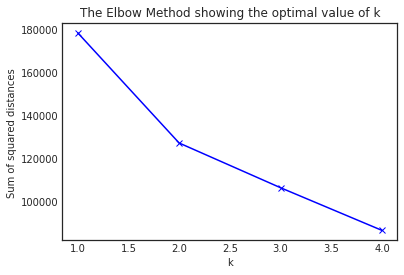

The minimum sum of sqaures of distances is : 86549.7303244  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [152]:
print("Kmeans on scaled data")
get_kmeans(scaled_X)

### PCA using 3 components on scaled data

The explained variance for pca applied on scaled data is 0.718945414848 using 3 components
Kmeans on sclaed data with PCA using 3 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 14883.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       2481.00    0.0
uninfected#     2480.00    1.0
infected%         50.01    0.0
uninfected%       49.99  100.0

Sum of square of distances is: 10160.3157229

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       2256.00    0.0  225.0
uninfected#     2455.00    1.0   25.0
infected%         47.89    0.0   90.0
uninfected%       52.11  100.0   10.0

Sum of square of distances is: 7466.65436478

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1      2        3
infected#       1278.0  183.00    0.0  1020.00
uninfected#     2252.0   23.00    1.0   205.00
infected%         36.2   88.83    0.0    83.27
uninfected%       63.8   11.17  100.0    16.73

Sum of square of distances is: 5161.48068173

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



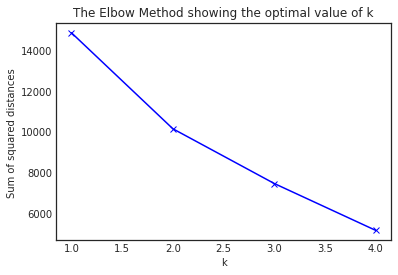

The minimum sum of sqaures of distances is : 5161.48068173  for k 4


In [153]:
pca=PCA(n_components=3,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 3 components")
print("Kmeans on sclaed data with PCA using 3 components:")
model=get_kmeans(X_pca_scaled)

### PCA on scaled data using 4 components

The explained variance for pca applied on scaled data is 0.76668502706 using 4 components
Kmeans on sclaed data with PCA using 4 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 19844.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       2481.00    0.0
uninfected#     2480.00    1.0
infected%         50.01    0.0
uninfected%       49.99  100.0

Sum of square of distances is: 15120.7651905

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1       2
infected#       2270.00    0.0  211.00
uninfected#     2458.00    1.0   22.00
infected%         48.01    0.0   90.56
uninfected%       51.99  100.0    9.44

Sum of square of distances is: 12392.8240169

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1      2       3
infected#       1362.0  194.00    0.0  925.00
uninfected#     2213.0   19.00    1.0  248.00
infected%         38.1   91.08    0.0   78.86
uninfected%       61.9    8.92  100.0   21.14

Sum of square of distances is: 9996.57706399

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



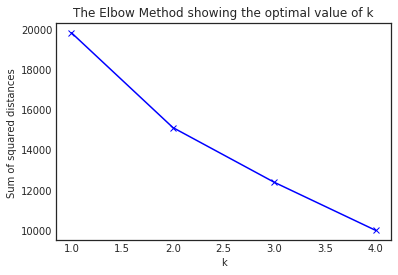

The minimum sum of sqaures of distances is : 9996.57706399  for k 4


In [154]:
### PCA on scaled data using 4 components
pca=PCA(n_components=4,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_4=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 4 components")
print("Kmeans on sclaed data with PCA using 4 components:")
model=get_kmeans(X_pca_scaled_4)

### PCA on scaled data using 5 components

The explained variance for pca applied on scaled data is 0.80146637952 using 5 components
Kmeans on sclaed data with PCA using 5 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 24805.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       2481.00    0.0
uninfected#     2480.00    1.0
infected%         50.01    0.0
uninfected%       49.99  100.0

Sum of square of distances is: 20079.4010903

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1       2
infected#       2141.00    0.0  340.00
uninfected#     2443.00    1.0   37.00
infected%         46.71    0.0   90.19
uninfected%       53.29  100.0    9.81

Sum of square of distances is: 17307.8055584

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1       2        3
infected#       1869.00    0.0  224.00   388.00
uninfected#      780.00    1.0   25.00  1675.00
infected%         70.55    0.0   89.96    18.81
uninfected%       29.45  100.0   10.04    81.19

Sum of square of distances is: 14643.2545004

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



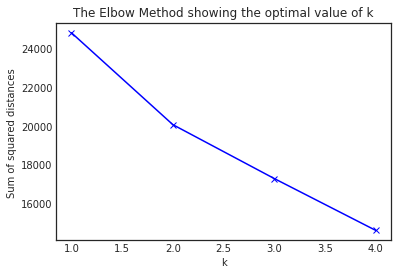

The minimum sum of sqaures of distances is : 14643.2545004  for k 4


In [155]:
### PCA on scaled data using 5 components
pca=PCA(n_components=5,whiten=True,random_state=0)
X_pca_scaled_5=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 5 components")
print("Kmeans on sclaed data with PCA using 5 components:")
model=get_kmeans(X_pca_scaled_5)

### PCA on scaled data using 6 components

The explained variance for pca applied on scaled data is 0.830320068877 using 6 components
Kmeans on sclaed data with PCA using 6 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 29766.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       2481.00    0.0
uninfected#     2480.00    1.0
infected%         50.01    0.0
uninfected%       49.99  100.0

Sum of square of distances is: 25038.4694036

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1      2
infected#       256.00  2225.00    0.0
uninfected#      65.00  2415.00    1.0
infected%        79.75    47.95    0.0
uninfected%      20.25    52.05  100.0

Sum of square of distances is: 22085.4510466

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2      3
infected#       1924.00   538.00    0.0   19.0
uninfected#      587.00  1893.00    1.0    0.0
infected%         76.62    22.13    0.0  100.0
uninfected%       23.38    77.87  100.0    0.0

Sum of square of distances is: 19182.5594623

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



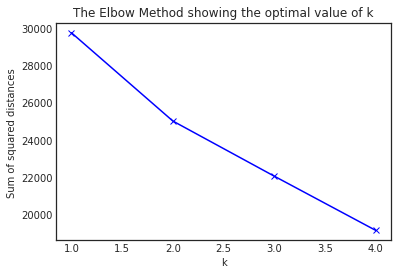

The minimum sum of sqaures of distances is : 19182.5594623  for k 4


In [156]:
### PCA on scaled data using 6 components
pca=PCA(n_components=6,whiten=True,random_state=0)
X_pca_scaled_6=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 6 components")
print("Kmeans on sclaed data with PCA using 6 components:")
model=get_kmeans(X_pca_scaled_6)

### PCA on scaled data using 9 components

The explained variance for pca applied on scaled data is 0.883955537065 using 9 components
Kmeans on sclaed data with PCA using 9 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 44649.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1963.00   518.00
uninfected#      724.00  1757.00
infected%         73.06    22.77
uninfected%       26.94    77.23

Sum of square of distances is: 41298.9383781

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0        1      2
infected#         0.0  2481.00    0.0
uninfected#      42.0  2438.00    1.0
infected%         0.0    50.44    0.0
uninfected%     100.0    49.56  100.0

Sum of square of distances is: 36596.1232391

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2      3
infected#        648.00  1833.00    0.0    0.0
uninfected#     1739.00   699.00   42.0    1.0
infected%         27.15    72.39    0.0    0.0
uninfected%       72.85    27.61  100.0  100.0

Sum of square of distances is: 33300.7044259

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



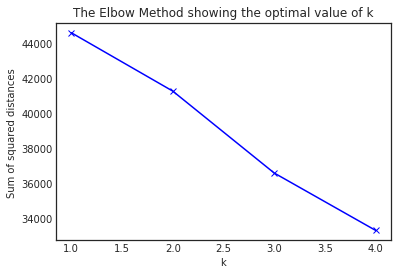

The minimum sum of sqaures of distances is : 33300.7044259  for k 4


In [157]:
### PCA on scaled data using 9 components
pca=PCA(n_components=9,whiten=True,random_state=0)
X_pca_scaled_9=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 9 components")
print("Kmeans on sclaed data with PCA using 9 components:")
model=get_kmeans(X_pca_scaled_9)

### PCA on scaled data using 11 components

The explained variance for pca applied on scaled data is 0.906472331652 using 11 components
Kmeans on sclaed data with PCA using 11 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 54571.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       2481.00    0.0
uninfected#     2479.00    2.0
infected%         50.02    0.0
uninfected%       49.98  100.0

Sum of square of distances is: 50810.3141157

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2
infected#       1952.00    0.0   529.00
uninfected#      717.00    1.0  1763.00
infected%         73.14    0.0    23.08
uninfected%       26.86  100.0    76.92

Sum of square of distances is: 46429.4509009

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1      2      3
infected#       1935.0   545.00    1.0    0.0
uninfected#      694.0  1786.00    0.0    1.0
infected%         73.6    23.38  100.0    0.0
uninfected%       26.4    76.62    0.0  100.0

Sum of square of distances is: 43337.1460843

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



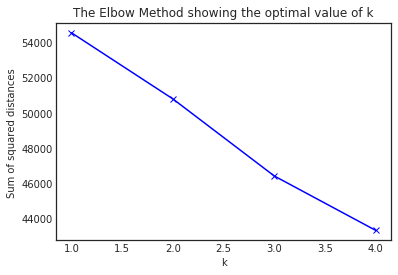

The minimum sum of sqaures of distances is : 43337.1460843  for k 4


In [158]:
### PCA on scaled data using 11 components
pca=PCA(n_components=11,whiten=True,random_state=0)
X_pca_scaled_11=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 11 components")
print("Kmeans on sclaed data with PCA using 11 components:")
model=get_kmeans(X_pca_scaled_11)

### PCA on scaled data using 12 components

The explained variance for pca applied on scaled data is 0.915582529751 using 12 components
Kmeans on sclaed data with PCA using 12 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 59532.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       2481.00    0.0
uninfected#     2479.00    2.0
infected%         50.02    0.0
uninfected%       49.98  100.0

Sum of square of distances is: 55770.2690039

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       2481.00    0.0    0.0
uninfected#     2478.00    1.0    2.0
infected%         50.03    0.0    0.0
uninfected%       49.97  100.0  100.0

Sum of square of distances is: 50977.662994

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1       2      3
infected#        513.00  237.00  1731.0    0.0
uninfected#     1693.00   31.00   756.0    1.0
infected%         23.25   88.43    69.6    0.0
uninfected%       76.75   11.57    30.4  100.0

Sum of square of distances is: 48594.1510617

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



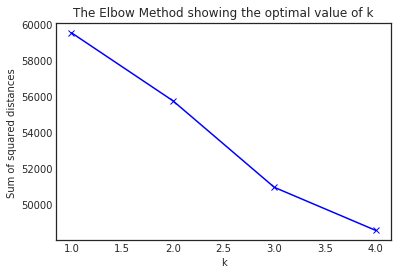

The minimum sum of sqaures of distances is : 48594.1510617  for k 4


In [159]:
### PCA on scaled data using 12 components
pca=PCA(n_components=12,whiten=True,random_state=0)
X_pca_scaled_12=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 12 components")
print("Kmeans on sclaed data with PCA using 12 components:")
model=get_kmeans(X_pca_scaled_12)

### PCA on scaled data using 13 components

The explained variance for pca applied on scaled data is 0.92323693469 using 13 components
Kmeans on sclaed data with PCA using 13 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     2481.0
infected%         50.0
uninfected%       50.0

Sum of square of distances is: 64493.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       2481.00    0.0
uninfected#     2479.00    2.0
infected%         50.02    0.0
uninfected%       49.98  100.0

Sum of square of distances is: 60727.7378315

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#       1610.00   871.00    0.0
uninfected#      723.00  1757.00    1.0
infected%         69.01    33.14    0.0
uninfected%       30.99    66.86  100.0

Sum of square of distances is: 56417.7483024

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1        2      3
infected#        551.00  126.00  1804.00    0.0
uninfected#     1702.00   62.00   716.00    1.0
infected%         24.46   67.02    71.59    0.0
uninfected%       75.54   32.98    28.41  100.0

Sum of square of distances is: 53526.9067724

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



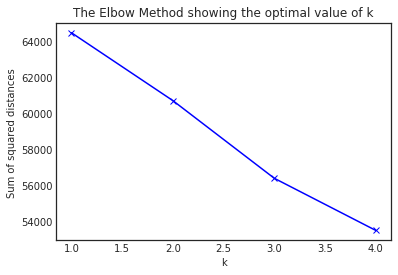

The minimum sum of sqaures of distances is : 53526.9067724  for k 4


In [160]:
### PCA on scaled data using 13 components
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_scaled_13=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 13 components")
print("Kmeans on sclaed data with PCA using 13 components:")
model=get_kmeans(X_pca_scaled_13)

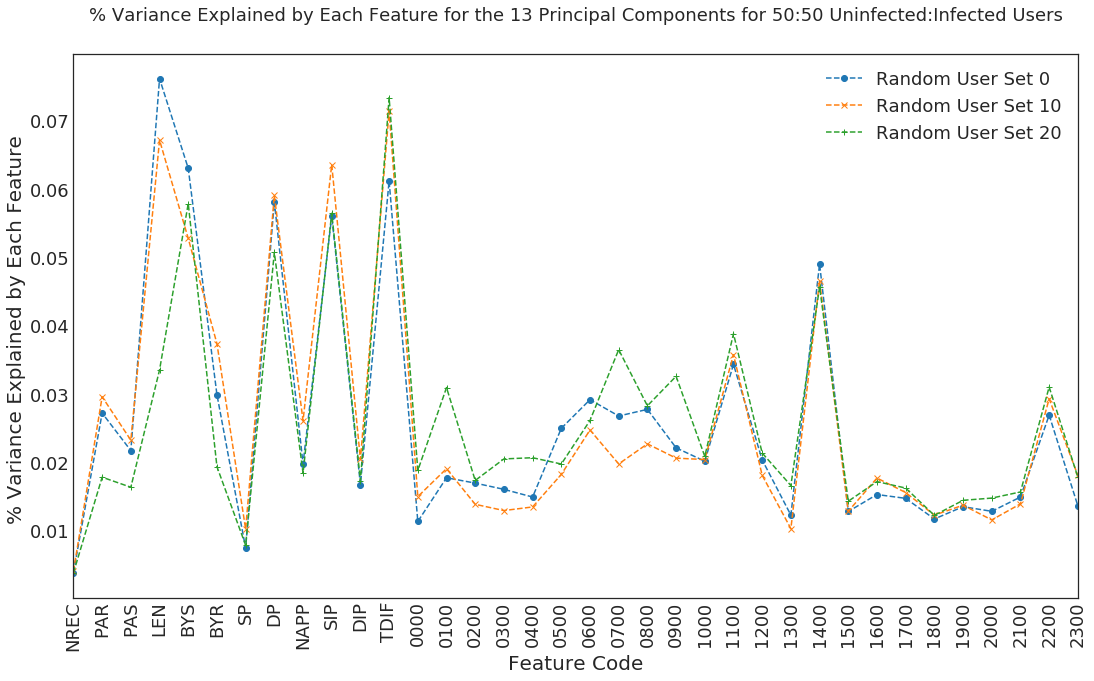

In [161]:
sns.set_style('white')
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data_50_0.std(axis=0)), '--o', label = 'Random User Set 0')
plt.plot(np.square(pca_inv_data_50_10.std(axis=0)), '--x', label = 'Random User Set 10')
plt.plot(np.square(pca_inv_data_50_20.std(axis=0)), '--+', label = 'Random User Set 20')
plt.legend(loc='lower right')
plt.ylabel('% Variance Explained by Each Feature ', fontsize=20)
plt.xlabel('Feature Code', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.title('% Variance Explained by Each Feature for the 13 Principal Components for 50:50 Uninfected:Infected Users',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
### Comment to save the plot
# plt.savefig('E2.jpeg', dpi=1200)
plt.show()

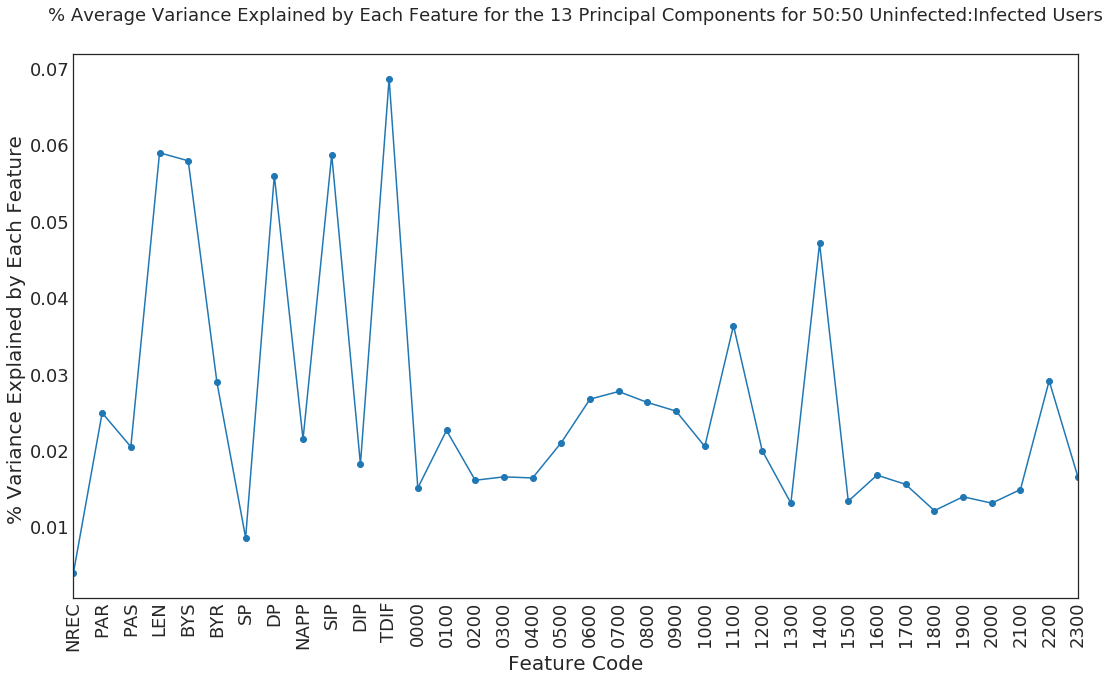

In [162]:
avg_variance_50=np.square(pca_inv_data_50_0.std(axis=0))+np.square(pca_inv_data_50_10.std(axis=0))+np.square(pca_inv_data_50_20.std(axis=0))

avg_variance_50=avg_variance_50/3

sns.set_style('white')
fig = plt.figure(figsize=(18, 10))
plt.plot(avg_variance_50, '-o')
plt.legend(loc='lower right')
plt.ylabel('% Variance Explained by Each Feature ', fontsize=20)
plt.xlabel('Feature Code', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.title('% Average Variance Explained by Each Feature for the 13 Principal Components for 50:50 Uninfected:Infected Users',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
### Comment to save the plot
# plt.savefig('E2.jpeg', dpi=1200)
plt.show()

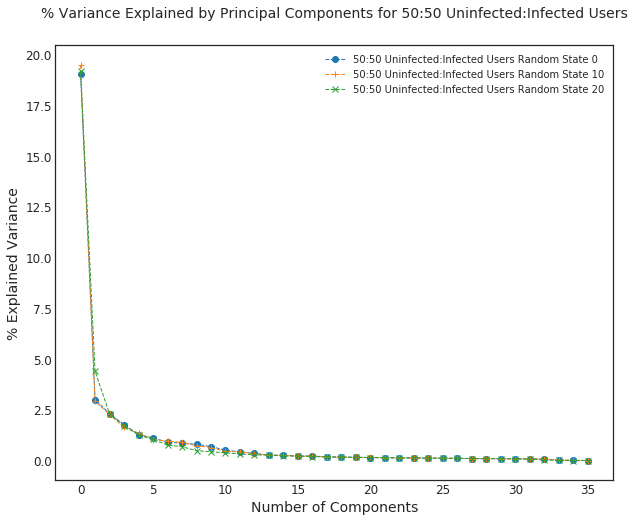

In [163]:
### Plot the scree plot to analyze the number of components to be selected for PCA

sns.set_style('white')
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca_explained_variance_50_0, '--o', linewidth=1,alpha=1,label='50:50 Uninfected:Infected Users Random State 0')
plt.plot(pca_explained_variance_50_10,'--+', linewidth=1,alpha=1,label='50:50 Uninfected:Infected Users Random State 10')
plt.plot(pca_explained_variance_50_20,'--x', linewidth=1,alpha=1,label='50:50 Uninfected:Infected Users Random State 20')
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components for 50:50 Uninfected:Infected Users',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


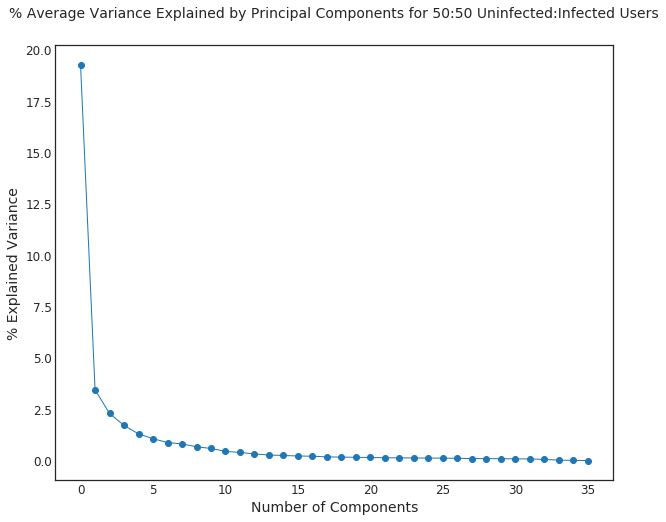

In [164]:
pca_explained_variance_50_avg=pca_explained_variance_50_0+pca_explained_variance_50_10+pca_explained_variance_50_20
pca_explained_variance_50_avg=pca_explained_variance_50_avg/3

sns.set_style('white')
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca_explained_variance_50_avg, '-o', linewidth=1,alpha=1)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Average Variance Explained by Principal Components for 50:50 Uninfected:Infected Users',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


<h2>2. <a id='2' style="text-decoration : none; color : #000000;"> 70:30 Uninfected:Infected Users</a></h2>
### 2.1  <a id='2.1' style="text-decoration : none; color : #000000;"> </a>Random State 0

In [165]:
z=pd.read_csv('../Collecting logs and Building Feature Set/Feature_Vector_70_30_2_15_random_state_0.csv',index_col='Source_User')

print("Infected/Uninfected Users")
z.Target.value_counts()

Infected/Uninfected Users


uninfected    5789
infected      2481
Name: Target, dtype: int64

### Feature Set

In [166]:
### Build our feature set
X=z.iloc[:,z.columns!='Target']

### Feature Code
X.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]
columns=X.columns
X.head(2)

NREC        PAR  \
Source_User                                                           
bb98d45a9bd0c40362a3ec37503c10b8238194752d35574...  4607  77.507923   
36d9d88841607ef5b1614c98854aadf57ca7de84854e90e...   169   5.840237   

                                                          PAS         LEN  \
Source_User                                                                 
bb98d45a9bd0c40362a3ec37503c10b8238194752d35574...  40.245713  100.283265   
36d9d88841607ef5b1614c98854aadf57ca7de84854e90e...   5.597633  149.763314   

                                                            BYS           BYR  \
Source_User                                                                     
bb98d45a9bd0c40362a3ec37503c10b8238194752d35574...  6930.568483  89947.788800   
36d9d88841607ef5b1614c98854aadf57ca7de84854e90e...  1016.976331   3222.147929   

                                                        SP     DP  NAPP  SIP  \
Source_User                                                                    
bb98d45a9bd0c40362a3ec37503c10b8238194752d35574...  3901.0  113.0    58   86   
36d9d88841607ef5b1614c98854aadf57ca7de84854e90e...   168.0    4.0     9   11   

                                                     DIP          TDIF  0000  \
Source_User                                                                    
bb98d45a9bd0c40362a3ec37503c10b8238194752d35574...  1116   1646.597569   167   
36d9d88841607ef5b1614c98854aadf57ca7de84854e90e...    16  40005.674556     0   

                                                    0100  0200  0300  0400  \
Source_User                                                                  
bb98d45a9bd0c40362a3ec37503c10b8238194752d35574...   295   328   198   223   
36d9d88841607ef5b1614c98854aadf57ca7de84854e90e...     0     0     0     0   

                                                    0500  0600  0700  0800  \
Source_User                                                                  
bb98d45a9bd0c40362a3ec37503c10b8238194752d35574...   135   144   145   194   
36d9d88841607ef5b1614c98854aadf57ca7de84854e90e...     0     0     0     8   

                                                    0900  1000  1100  1200  \
Source_User                                                                  
bb98d45a9bd0c40362a3ec37503c10b8238194752d35574...   197   196   178   120   
36d9d88841607ef5b1614c98854aadf57ca7de84854e90e...     8     0     0    39   

                                                    1300  1400  1500  1600  \
Source_User                                                                  
bb98d45a9bd0c40362a3ec37503c10b8238194752d35574...   145   118   224   172   
36d9d88841607ef5b1614c98854aadf57ca7de84854e90e...    48    40    10     4   

                                                    1700  1800  1900  2000  \
Source_User                                                                  
bb98d45a9bd0c40362a3ec37503c10b8238194752d35574...   241   246   151   165   
36d9d88841607ef5b1614c98854aadf57ca7de84854e90e...     4     2     6     0   

                                                    2100  2200  2300  
Source_User                                                           
bb98d45a9bd0c40362a3ec37503c10b8238194752d35574...   177   134   314  
36d9d88841607ef5b1614c98854aadf57ca7de84854e90e...     0     0     0

In [167]:
### Store the labels ['Infected','Uninfected'] in a separate frame to analyze the clusters later
target=z.Target.reset_index(drop=True)

### Scaled X

In [168]:
### Retain the original data and column names
orig_X=X.copy()
## Create a new feature set and scale it using Standard Scaler
X=X.values
scaler_X=StandardScaler()
scaler_X.fit(X)
scaled_X=scaler_X.transform(X)
scaled_X[0:2]

array([[ 0.40731721, -0.17690781, -0.16514525, -0.03367823, -0.12655963,
        -0.17205188,  0.56829715,  0.1937381 ,  1.53355518,  1.04559336,
         0.60343568, -0.22934609,  0.13922105,  0.55449396,  0.69436873,
         0.24414373,  0.32747148,  0.04462338,  0.09985174,  0.12938479,
         0.43868597,  0.49426736,  0.61646616,  0.39859357,  0.09891864,
         0.26549109,  0.07094962,  0.76429906,  0.35301098,  0.65041966,
         0.60356627,  0.12940932,  0.16382734,  0.20111369,  0.01272508,
         0.74610511],
       [-0.6156277 , -0.36656885, -0.33619509,  0.25127483, -0.21683601,
        -0.34912407, -0.75060764, -0.10336394, -1.18869118, -0.99317859,
        -0.71368744,  0.24773803, -0.5082737 , -0.48382455, -0.46357344,
        -0.44166122, -0.41949321, -0.39650938, -0.40825817, -0.46189257,
        -0.50574445, -0.56264699, -0.6589268 , -0.62363958, -0.43642016,
        -0.38064919, -0.38970767, -0.61250224, -0.63495783, -0.58184147,
        -0.57689492, -0.53537

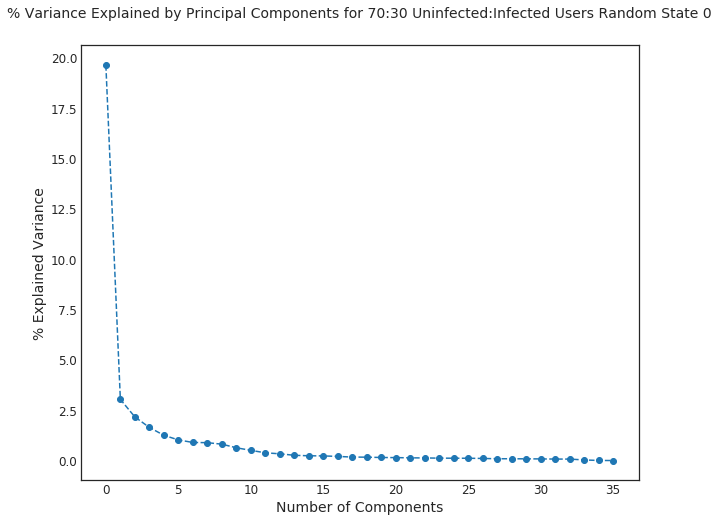

In [169]:
### Plot the scree plot to analyze the number of components to be selected for PCA

sns.set_style('white')
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o')
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components for 70:30 Uninfected:Infected Users Random State 0',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


In [170]:
pca_explained_variance_70_0=pca.explained_variance_

In [171]:
### Analyze how each of the origunal component contributes to explain the variance using the decided number of components
pca=PCA(n_components=13,random_state=0)
X_pca1_13=pca.fit_transform(scaled_X)
print("Table for components of PCA when using 13 components with explained variance of",sum(pca.explained_variance_ratio_))
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12','PC-13'])
m

Table for components of PCA when using 13 components with explained variance of 0.922348229056


NREC       PAR       PAS       LEN       BYS       BYR        SP  \
PC-1   0.224340  0.015561  0.008624 -0.006109  0.005424  0.015543  0.211958   
PC-2  -0.005837  0.557336  0.557470  0.016193  0.267973  0.548117  0.008332   
PC-3   0.053268 -0.010384 -0.014534  0.077479 -0.012226 -0.009604  0.028205   
PC-4   0.028973 -0.006913 -0.016126  0.050179 -0.029730 -0.005592 -0.047247   
PC-5   0.012023  0.026254  0.044651  0.385654 -0.001805  0.024713 -0.149715   
PC-6  -0.043492 -0.033361 -0.012610  0.578061  0.065474 -0.041191 -0.029857   
PC-7   0.017096 -0.084830  0.004010  0.640142  0.321272 -0.110900  0.116173   
PC-8  -0.003674 -0.192873  0.039542 -0.292556  0.871722 -0.252638 -0.047697   
PC-9  -0.039507  0.017404 -0.007378 -0.097074 -0.070370  0.021943  0.054242   
PC-10  0.011098 -0.006606  0.006340  0.025906  0.041661 -0.008821  0.054913   
PC-11 -0.004361 -0.000147 -0.009844 -0.034568 -0.003676  0.001169  0.018060   
PC-12 -0.003328  0.001964  0.003709 -0.013078  0.006635  0.001258  0.006517   
PC-13  0.023866 -0.000406  0.006155  0.002972 -0.010373  0.001421 -0.081820   

             DP      NAPP       SIP       DIP      TDIF      0000      0100  \
PC-1   0.081186  0.174299  0.110844  0.200126 -0.038597  0.193170  0.179833   
PC-2  -0.017682  0.031245  0.016984  0.000430 -0.025982  0.002453  0.009382   
PC-3   0.234745 -0.094649 -0.140451  0.098513  0.061337  0.007550  0.139412   
PC-4  -0.070830 -0.105222 -0.200344 -0.040238  0.117023  0.235031  0.259362   
PC-5   0.410508 -0.345713 -0.430738  0.072570  0.446928 -0.053601 -0.143846   
PC-6   0.418316  0.142017  0.245791  0.226613 -0.495344 -0.019540  0.001399   
PC-7  -0.513466  0.087489  0.159992 -0.179152  0.269061  0.044134  0.062634   
PC-8   0.191289 -0.029880 -0.033365  0.058025  0.010039 -0.013165 -0.018021   
PC-9   0.205290  0.248500  0.445975  0.180937  0.667333  0.007787  0.075009   
PC-10 -0.176034 -0.101067 -0.383928 -0.058140 -0.116096  0.132455  0.233236   
PC-11  0.191252  0.036982  0.034004  0.145358 -0.007451  0.320180  0.229629   
PC-12  0.064720 -0.011868 -0.040316  0.021723  0.002628 -0.024784  0.043763   
PC-13 -0.006230 -0.122885  0.219921 -0.118585 -0.018783  0.067931 -0.147648   

           0200      0300      0400      0500      0600      0700      0800  \
PC-1   0.174198  0.169872  0.169242  0.161974  0.158409  0.155736  0.166313   
PC-2   0.014741  0.012779  0.007396  0.001992 -0.002400 -0.014228 -0.017686   
PC-3   0.244795  0.351801  0.380581  0.379701  0.336889  0.178567  0.038854   
PC-4   0.238718  0.137395  0.044432 -0.057695 -0.181149 -0.340427 -0.374246   
PC-5  -0.153522 -0.122777 -0.067372 -0.036373  0.009539  0.058589  0.072778   
PC-6   0.008953  0.009831 -0.022792 -0.067310 -0.107228 -0.175226 -0.167750   
PC-7   0.046303  0.005394  0.000700  0.022489  0.037575  0.098758  0.110306   
PC-8  -0.014357 -0.003183  0.003366  0.001832 -0.006281 -0.035138 -0.048355   
PC-9   0.071809  0.062845 -0.001900 -0.059394 -0.120785 -0.196667 -0.160718   
PC-10  0.169315  0.122400  0.020907 -0.062470 -0.167792 -0.222139 -0.103025   
PC-11  0.027755 -0.113002 -0.185736 -0.252150 -0.209191  0.174930  0.265065   
PC-12  0.076900  0.094937  0.047593 -0.054649 -0.168446 -0.011118  0.147931   
PC-13 -0.263210 -0.131974  0.045354  0.285615  0.305131 -0.199103 -0.144069   

           0900      1000      1100      1200      1300      1400      1500  \
PC-1   0.173930  0.181385  0.176395  0.186311  0.195330  0.181084  0.197616   
PC-2  -0.019164 -0.019530 -0.018436 -0.018558 -0.017614 -0.016916 -0.014145   
PC-3  -0.072014 -0.116547 -0.100181 -0.148598 -0.142396 -0.172124 -0.160972   
PC-4  -0.322550 -0.269511 -0.220371 -0.155311 -0.057011 -0.009908  0.050937   
PC-5   0.081907  0.086116  0.096739  0.057296  0.057168  0.064615  0.058180   
PC-6  -0.112867 -0.017478  0.046763  0.035858  0.022947  0.003917  0.021018   
PC-7   0.079668 -0.007186 -0.078962 -0.035256 -0.030539 -0.018988 -0.036184   
PC-8  -0.032400 -0.016187  0.017949 -0.000066  0.012886  0

In [172]:
pca_inv_data_70_0=pca.components_
pca_data_70_0=m

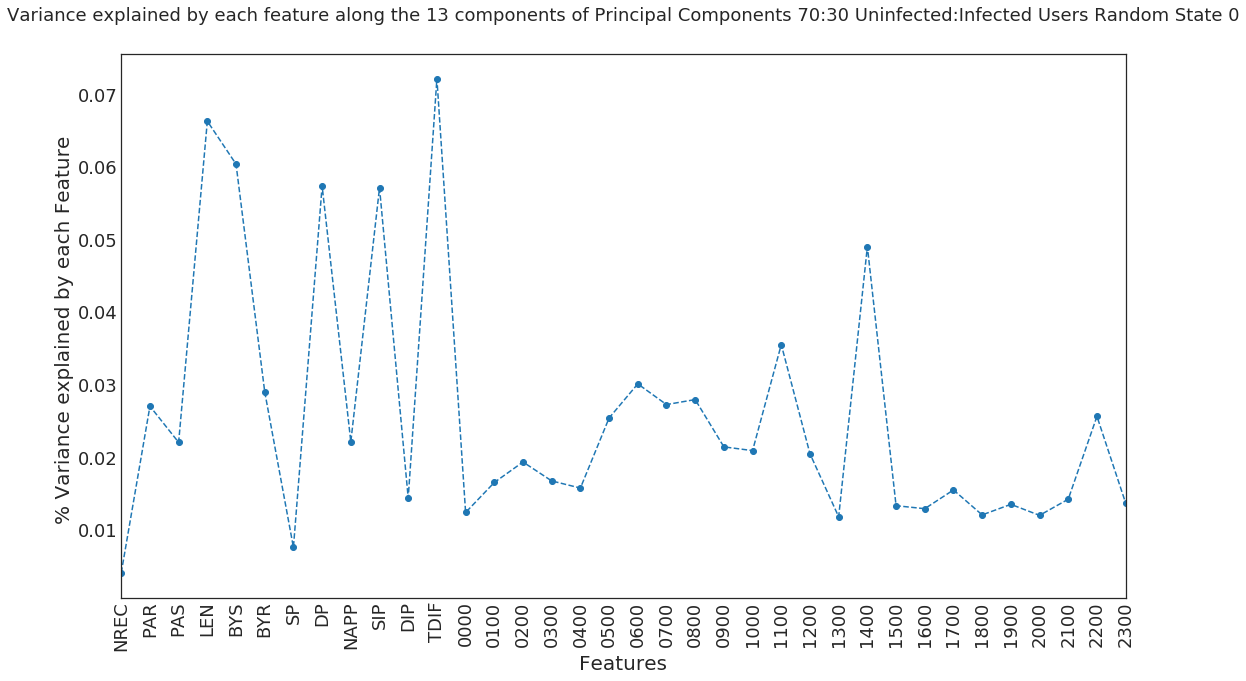

In [173]:
pca_inv_data = pca.components_

### Plot the variance explained by each feature for the decided number of components of PCA
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.title('Variance explained by each feature along the 13 components of Principal Components 70:30 Uninfected:Infected Users Random State 0',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('B.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

### For the rest of part 1,i.e. for 70:30 Infected and Uninfected Users split we apply Kmeans for differnet combinations of data which include scaled data, PCA with Scaled data using differnet number of components and analyze not only the sum of square of distances but also the cluster purity based on the ground truth.

### K-Means

Kmeans on data


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 2.07299879572e+15

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       2478.00   3.00
uninfected#     5773.00  16.00
infected%         30.03  15.79
uninfected%       69.97  84.21

Sum of square of distances is: 1.05293636245e+15

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       2469.00    0.0  12.00
uninfected#     5755.00    2.0  32.00
infected%         30.02    0.0  27.27
uninfected%       69.98  100.0  72.73

Sum of square of distances is: 6.63871211931e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1       2     3
infected#       2351.00    0.0  125.00   5.0
uninfected#     5600.00    2.0  172.00  15.0
infected%         29.57    0.0   42.09  25.0
uninfected%       70.43  100.0   57.91  75.0

Sum of square of distances is: 4.07946476738e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



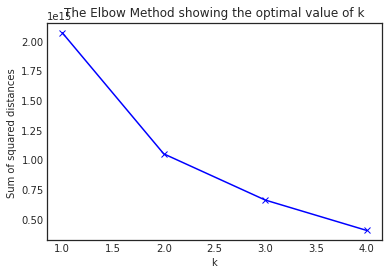

The minimum sum of sqaures of distances is : 4.07946476738e+14  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [174]:
print("Kmeans on data")
get_kmeans(X)

### K-Means on scaled data

Kmeans on scaled data


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 297720.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1060.00  1421.00
uninfected#     5161.00   628.00
infected%         17.04    69.35
uninfected%       82.96    30.65

Sum of square of distances is: 206515.609865

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1       2
infected#        761.00  1571.00  149.00
uninfected#     4893.00   870.00   26.00
infected%         13.46    64.36   85.14
uninfected%       86.54    35.64   14.86

Sum of square of distances is: 175097.212069

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1     2        3
infected#        628.00  346.00   3.0  1504.00
uninfected#     4764.00   74.00   2.0   949.00
infected%         11.65   82.38  60.0    61.31
uninfected%       88.35   17.62  40.0    38.69

Sum of square of distances is: 157011.831455

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



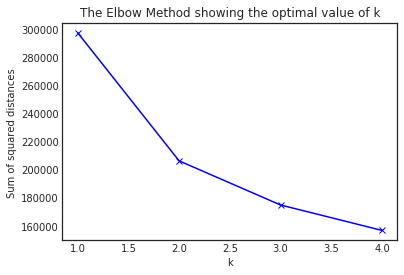

The minimum sum of sqaures of distances is : 157011.831455  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [175]:
print("Kmeans on scaled data")
get_kmeans(scaled_X)

### PCA using 3 components on scaled data

The explained variance for pca applied on scaled data is 0.689687388586 using 3 components
Kmeans on sclaed data with PCA using 3 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 24807.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#        961.00  1520.00
uninfected#     5063.00   726.00
infected%         15.95    67.68
uninfected%       84.05    32.32

Sum of square of distances is: 20121.0458805

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#       1027.00  1451.00   3.00
uninfected#     5130.00   644.00  15.00
infected%         16.68    69.26  16.67
uninfected%       83.32    30.74  83.33

Sum of square of distances is: 16011.8232257

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2       3
infected#       1040.00   3.00  1250.00  188.00
uninfected#     5035.00  15.00   668.00   71.00
infected%         17.12  16.67    65.17   72.59
uninfected%       82.88  83.33    34.83   27.41

Sum of square of distances is: 12128.1943686

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



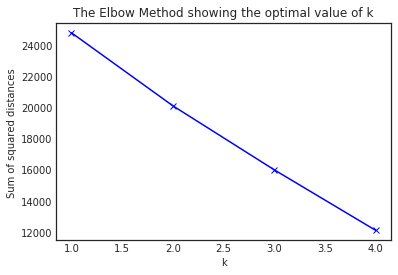

The minimum sum of sqaures of distances is : 12128.1943686  for k 4


In [176]:
pca=PCA(n_components=3,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 3 components")
print("Kmeans on sclaed data with PCA using 3 components:")
model=get_kmeans(X_pca_scaled)

### PCA on scaled data using 4 components

The explained variance for pca applied on scaled data is 0.735363818071 using 4 components
Kmeans on sclaed data with PCA using 4 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 33076.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1
infected#        957.0  1524.00
uninfected#     5024.0   765.00
infected%         16.0    66.58
uninfected%       84.0    33.42

Sum of square of distances is: 28374.5679756

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#       1001.00  1477.00   3.00
uninfected#     5078.00   696.00  15.00
infected%         16.47    67.97  16.67
uninfected%       83.53    32.03  83.33

Sum of square of distances is: 24267.0080333

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0        1       2        3
infected#        3.00  1063.00  196.00  1219.00
uninfected#     15.00  5018.00   70.00   686.00
infected%       16.67    17.48   73.68    63.99
uninfected%     83.33    82.52   26.32    36.01

Sum of square of distances is: 20298.1118541

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



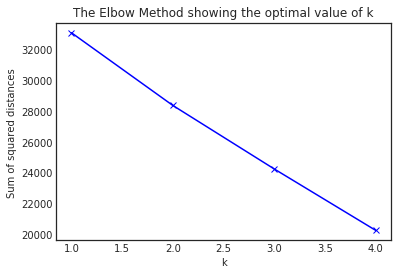

The minimum sum of sqaures of distances is : 20298.1118541  for k 4


In [177]:
### PCA on scaled data using 4 components
pca=PCA(n_components=4,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_4=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 4 components")
print("Kmeans on sclaed data with PCA using 4 components:")
model=get_kmeans(X_pca_scaled_4)

### PCA on scaled data using 5 components

The explained variance for pca applied on scaled data is 0.770189334943 using 5 components
Kmeans on sclaed data with PCA using 5 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 41345.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#        667.00  1814.00
uninfected#     4732.00  1057.00
infected%         12.35    63.18
uninfected%       87.65    36.82

Sum of square of distances is: 36286.1376647

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1       2
infected#        491.00  1685.00  305.00
uninfected#     4254.00  1425.00  110.00
infected%         10.35    54.18   73.49
uninfected%       89.65    45.82   26.51

Sum of square of distances is: 32249.5990488

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1      2        3
infected#       1717.00  285.00   3.00   476.00
uninfected#     1482.00  105.00  15.00  4187.00
infected%         53.67   73.08  16.67    10.21
uninfected%       46.33   26.92  83.33    89.79

Sum of square of distances is: 28075.5370849

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



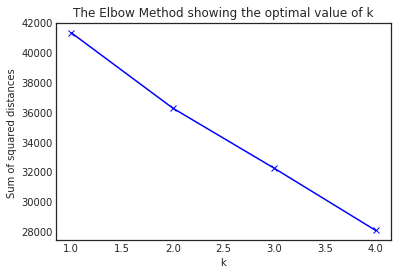

The minimum sum of sqaures of distances is : 28075.5370849  for k 4


In [178]:
### PCA on scaled data using 5 components
pca=PCA(n_components=5,whiten=True,random_state=0)
X_pca_scaled_5=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 5 components")
print("Kmeans on sclaed data with PCA using 5 components:")
model=get_kmeans(X_pca_scaled_5)

### PCA on scaled data using 6 components

The explained variance for pca applied on scaled data is 0.798625490798 using 6 components
Kmeans on sclaed data with PCA using 6 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 49614.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1841.00   640.00
uninfected#     1102.00  4687.00
infected%         62.56    12.01
uninfected%       37.44    87.99

Sum of square of distances is: 44528.7823564

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2
infected#        564.00  20.00  1897.00
uninfected#     4524.00  28.00  1237.00
infected%         11.08  41.67    60.53
uninfected%       88.92  58.33    39.47

Sum of square of distances is: 39615.5252895

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1        2      3
infected#        344.00  363.00  1758.00  16.00
uninfected#     3792.00  143.00  1826.00  28.00
infected%          8.32   71.74    49.05  36.36
uninfected%       91.68   28.26    50.95  63.64

Sum of square of distances is: 35727.2720634

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



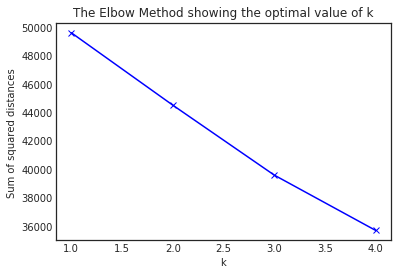

The minimum sum of sqaures of distances is : 35727.2720634  for k 4


In [179]:
### PCA on scaled data using 6 components
pca=PCA(n_components=6,whiten=True,random_state=0)
X_pca_scaled_6=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 6 components")
print("Kmeans on sclaed data with PCA using 6 components:")
model=get_kmeans(X_pca_scaled_6)

### PCA on scaled data using 9 components

The explained variance for pca applied on scaled data is 0.870764407896 using 9 components
Kmeans on sclaed data with PCA using 9 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 74421.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#        436.00  2045.00
uninfected#     3903.00  1886.00
infected%         10.05    52.02
uninfected%       89.95    47.98

Sum of square of distances is: 68664.0655075

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#        438.00  2043.00    0.0
uninfected#     3909.00  1861.00   19.0
infected%         10.08    52.33    0.0
uninfected%       89.92    47.67  100.0

Sum of square of distances is: 63538.7975242

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2     3
infected#       2045.00   435.00    0.0   1.0
uninfected#     1873.00  3896.00   19.0   1.0
infected%         52.19    10.04    0.0  50.0
uninfected%       47.81    89.96  100.0  50.0

Sum of square of distances is: 59138.5928569

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



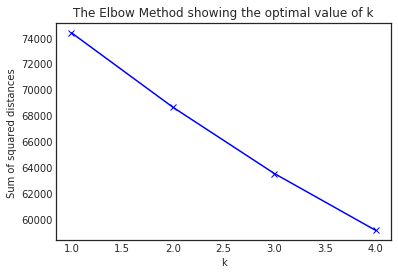

The minimum sum of sqaures of distances is : 59138.5928569  for k 4


In [180]:
### PCA on scaled data using 9 components
pca=PCA(n_components=9,whiten=True,random_state=0)
X_pca_scaled_9=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 9 components")
print("Kmeans on sclaed data with PCA using 9 components:")
model=get_kmeans(X_pca_scaled_9)

### PCA on scaled data using 11 components

The explained variance for pca applied on scaled data is 0.902416888217 using 11 components
Kmeans on sclaed data with PCA using 11 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 90959.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1
infected#        397.0  2084.00
uninfected#     3871.0  1918.00
infected%          9.3    52.07
uninfected%       90.7    47.93

Sum of square of distances is: 85112.3961931

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2
infected#        400.00    0.0  2081.00
uninfected#     3865.00   19.0  1905.00
infected%          9.38    0.0    52.21
uninfected%       90.62  100.0    47.79

Sum of square of distances is: 79962.6157743

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1        2      3
infected#       1614.00  494.00   373.00    0.0
uninfected#     1951.00  172.00  3647.00   19.0
infected%         45.27   74.17     9.28    0.0
uninfected%       54.73   25.83    90.72  100.0

Sum of square of distances is: 75400.7507239

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



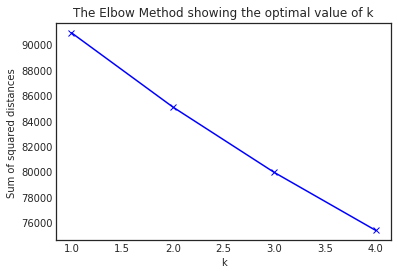

The minimum sum of sqaures of distances is : 75400.7507239  for k 4


In [181]:
### PCA on scaled data using 11 components
pca=PCA(n_components=11,whiten=True,random_state=0)
X_pca_scaled_11=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 11 components")
print("Kmeans on sclaed data with PCA using 11 components:")
model=get_kmeans(X_pca_scaled_11)

### PCA on scaled data using 12 components

The explained variance for pca applied on scaled data is 0.913093615159 using 12 components
Kmeans on sclaed data with PCA using 12 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 99228.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#        403.00  2078.00
uninfected#     3875.00  1914.00
infected%          9.42    52.05
uninfected%       90.58    47.95

Sum of square of distances is: 93381.8719066

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0     1        2
infected#        399.00  19.0  2063.00
uninfected#     3862.00   6.0  1921.00
infected%          9.36  76.0    51.78
uninfected%       90.64  24.0    48.22

Sum of square of distances is: 88547.5268884

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2      3
infected#        411.00  2068.00    0.0   2.00
uninfected#     3839.00  1921.00   19.0  10.00
infected%          9.67    51.84    0.0  16.67
uninfected%       90.33    48.16  100.0  83.33

Sum of square of distances is: 83490.8738475

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



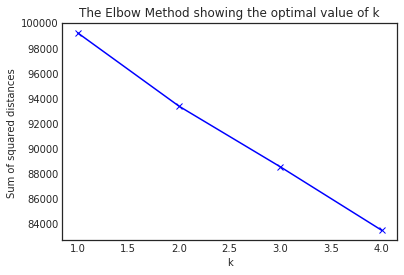

The minimum sum of sqaures of distances is : 83490.8738475  for k 4


In [182]:
### PCA on scaled data using 12 components
pca=PCA(n_components=12,whiten=True,random_state=0)
X_pca_scaled_12=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 12 components")
print("Kmeans on sclaed data with PCA using 12 components:")
model=get_kmeans(X_pca_scaled_12)

### PCA on scaled data using 13 components

The explained variance for pca applied on scaled data is 0.922348229056 using 13 components
Kmeans on sclaed data with PCA using 13 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 107497.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#        388.00  2093.00
uninfected#     3856.00  1933.00
infected%          9.14    51.99
uninfected%       90.86    48.01

Sum of square of distances is: 101642.728171

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1        2
infected#        386.0  501.00  1594.00
uninfected#     3719.0  172.00  1898.00
infected%          9.4   74.44    45.65
uninfected%       90.6   25.56    54.35

Sum of square of distances is: 96848.467583

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2       3
infected#        386.00   2.00  1591.00  502.00
uninfected#     3715.00  10.00  1885.00  179.00
infected%          9.41  16.67    45.77   73.72
uninfected%       90.59  83.33    54.23   26.28

Sum of square of distances is: 92119.6344846

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



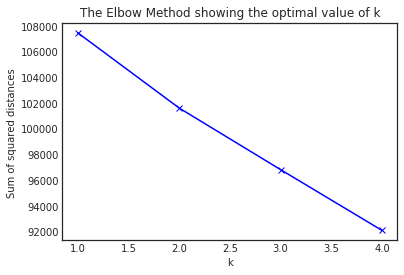

The minimum sum of sqaures of distances is : 92119.6344846  for k 4


In [183]:
### PCA on scaled data using 13 components
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_scaled_13=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 13 components")
print("Kmeans on sclaed data with PCA using 13 components:")
model=get_kmeans(X_pca_scaled_13)

### 2.2  <a id='2.2' style="text-decoration : none; color : #000000;"> Random State 10</a>

In [184]:
z=pd.read_csv('../Collecting logs and Building Feature Set/Feature_Vector_70_30_2_15_random_state_10.csv',index_col='Source_User')
print("Infected/Uninfected Users")
z.Target.value_counts()

Infected/Uninfected Users


uninfected    5789
infected      2481
Name: Target, dtype: int64

### Feature Set

In [185]:
### Build our feature set
X=z.iloc[:,z.columns!='Target']
X.head(2)

Count  Packets Received  \
Source_User                                                                   
644acf067fe760509d55b90a2ab91e9c5e78d260c7214a3...   3030        230.950495   
a434cc3ad58dedb0ed629a1bf82cb810fdad9a7ab47ce85...    599        158.008347   

                                                    Packets Sent  \
Source_User                                                        
644acf067fe760509d55b90a2ab91e9c5e78d260c7214a3...     80.524092   
a434cc3ad58dedb0ed629a1bf82cb810fdad9a7ab47ce85...     57.856427   

                                                    Elapsed_Time   Bytes_sent  \
Source_User                                                                     
644acf067fe760509d55b90a2ab91e9c5e78d260c7214a3...     84.155116  9686.861716   
a434cc3ad58dedb0ed629a1bf82cb810fdad9a7ab47ce85...     82.028381  6161.512521   

                                                    Bytes_received  \
Source_User                                                          
644acf067fe760509d55b90a2ab91e9c5e78d260c7214a3...   287727.528383   
a434cc3ad58dedb0ed629a1bf82cb810fdad9a7ab47ce85...   198461.532554   

                                                    Source_Port  \
Source_User                                                       
644acf067fe760509d55b90a2ab91e9c5e78d260c7214a3...       2741.0   
a434cc3ad58dedb0ed629a1bf82cb810fdad9a7ab47ce85...        587.0   

                                                    Destination_Port  \
Source_User                                                            
644acf067fe760509d55b90a2ab91e9c5e78d260c7214a3...              11.0   
a434cc3ad58dedb0ed629a1bf82cb810fdad9a7ab47ce85...              12.0   

                                                    Application  Source_IP  \
Source_User                                                                  
644acf067fe760509d55b90a2ab91e9c5e78d260c7214a3...           40         63   
a434cc3ad58dedb0ed629a1bf82cb810fdad9a7ab47ce85...           30         70   

                                                    Destination_IP  \
Source_User                                                          
644acf067fe760509d55b90a2ab91e9c5e78d260c7214a3...             820   
a434cc3ad58dedb0ed629a1bf82cb810fdad9a7ab47ce85...             210   

                                                    Received_Time_diff    0  \
Source_User                                                                   
644acf067fe760509d55b90a2ab91e9c5e78d260c7214a3...         2395.224422  195   
a434cc3ad58dedb0ed629a1bf82cb810fdad9a7ab47ce85...        12098.198664    0   

                                                      1    2   3   4   5   6  \
Source_User                                                                    
644acf067fe760509d55b90a2ab91e9c5e78d260c7214a3...  256  110  55  63  53  56   
a434cc3ad58dedb0ed629a1bf82cb810fdad9a7ab47ce85...    3    3   2   4   2   0   

                                                     7   8   9   10  11  12  \
Source_User                                                                   
644acf067fe760509d55b90a2ab91e9c5e78d260c7214a3...  31  79  81   39  75  98   
a434cc3ad58dedb0ed629a1bf82cb810fdad9a7ab47ce85...  34  70  92  117  30  10   

                                                    13   14   15   16   17  \
Source_User                                                                  
644acf067fe760509d55b90a2ab91e9c5e78d260c7214a3...  81  159  264  181  142   
a434cc3ad58dedb0ed629a1bf82cb810fdad9a7ab47ce85...  14    7    5   25   37   

                                                     18   19   20   21   22  \
Source_User                                                                   
644acf067fe760509d55b90a2ab91e9c5e78d260c7214a3...  177  135  120  184  240   
a434cc3ad58dedb0ed629a1bf82cb810fdad9a7ab47ce85...   61   27   27   25    1   

                                                     23  
Source_User                                              
644

In [186]:
### Store the labels ['Infected','Uninfected'] in a separate frame to analyze the clusters later
target=z.Target.reset_index(drop=True)

### Scaled X

In [187]:
### Retain the original data and column names
orig_X=X.copy()
## Create a new feature set and scale it using Standard Scaler
X=X.values
scaler_X=StandardScaler()
scaler_X.fit(X)
scaled_X=scaler_X.transform(X)
scaled_X[0:2]

array([[ 0.0331528 ,  0.15872291,  0.00896433, -0.16572075, -0.04509643,
         0.16642742,  0.14779395, -0.07530794,  0.52724251,  0.40424497,
         0.25533753, -0.22761228,  0.24763609,  0.39951489, -0.08122617,
        -0.24911443, -0.20580145, -0.22582913, -0.20734686, -0.33694166,
        -0.14739573, -0.15551866, -0.40867871, -0.1898408 , -0.04330065,
        -0.15945474,  0.30437398,  1.02821908,  0.39963264,  0.12990598,
         0.22612903,  0.02744348, -0.03850655,  0.2236067 ,  0.40831445,
         0.08950013],
       [-0.50838159,  0.01509216, -0.06438918, -0.18517859, -0.06216159,
         0.02840155, -0.60175957, -0.07247259, -0.02263334,  0.59053787,
        -0.4862641 , -0.10442124, -0.52234581, -0.47104591, -0.44594312,
        -0.42223932, -0.38804558, -0.38533042, -0.38751587, -0.3246017 ,
        -0.19235415, -0.09223997,  0.09381121, -0.44699592, -0.62199983,
        -0.60364585, -0.566404  , -0.64817794, -0.5100509 , -0.41559622,
        -0.2732738 , -0.35829

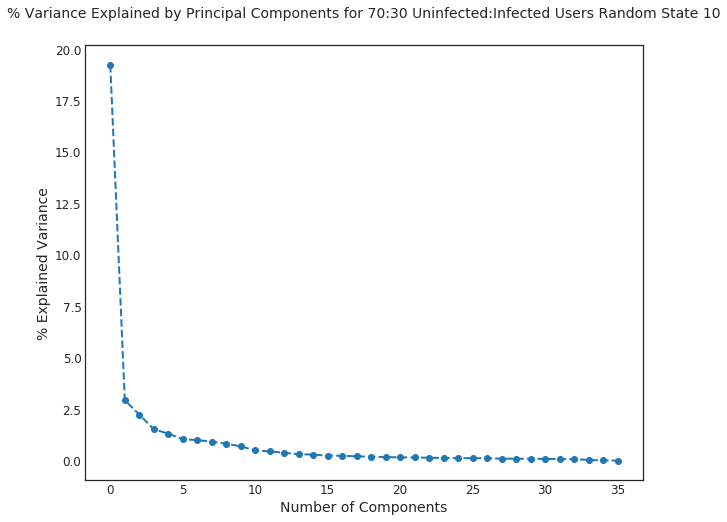

In [188]:
### Plot the scree plot to analyze the number of components to be selected for PCA

sns.set_style('white')
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components for 70:30 Uninfected:Infected Users Random State 10',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


In [189]:
pca_explained_variance_70_10=pca.explained_variance_

In [190]:
### Analyze how each of the origunal component contributes to explain the variance using the decided number of components
pca=PCA(n_components=13,random_state=0)
X_pca1_13=pca.fit_transform(scaled_X)
print("Table for components of PCA when using 13 components with explained variance of",sum(pca.explained_variance_ratio_))
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12','PC-13'])
m

Table for components of PCA when using 13 components with explained variance of 0.915617452326


Count  Packets Received  Packets Sent  Elapsed_Time  Bytes_sent  \
PC-1   0.226467          0.009664      0.002778     -0.007183   -0.000843   
PC-2  -0.001751          0.564658      0.561694      0.036471    0.273752   
PC-3   0.058173         -0.019131     -0.019501      0.095328   -0.012037   
PC-4   0.038851         -0.011284     -0.013239      0.032109   -0.012362   
PC-5   0.012187         -0.016853      0.033144      0.448998    0.060976   
PC-6   0.051037         -0.068740      0.076669     -0.478099    0.323733   
PC-7  -0.020271         -0.217247      0.149045      0.117663    0.811100   
PC-8   0.001395          0.011067      0.016237     -0.483210    0.029831   
PC-9   0.025133         -0.025804      0.005473      0.508429    0.052878   
PC-10 -0.015527          0.009009     -0.011861     -0.223758   -0.023521   
PC-11  0.008296          0.003561      0.006854      0.018995   -0.007847   
PC-12  0.007268         -0.002337     -0.000732      0.018360    0.004291   
PC-13 -0.003322         -0.000026     -0.000188     -0.014708    0.000874   

       Bytes_received  Source_Port  Destination_Port  Application  Source_IP  \
PC-1         0.010425     0.214339          0.079630     0.175792   0.111440   
PC-2         0.535359     0.005601         -0.006677     0.013926   0.005004   
PC-3        -0.017375     0.007927          0.195371    -0.125068  -0.170604   
PC-4        -0.009664    -0.035344         -0.140681    -0.102910  -0.192002   
PC-5        -0.030257    -0.130095          0.398250    -0.306756  -0.372521   
PC-6        -0.123401    -0.003853         -0.417472    -0.182938  -0.274310   
PC-7        -0.361831     0.009488          0.141432     0.097104   0.166706   
PC-8         0.010084    -0.138858          0.519870    -0.179313  -0.303013   
PC-9        -0.036863     0.000484         -0.174243    -0.020001   0.035982   
PC-10        0.013056    -0.000147          0.297238     0.203938   0.519057   
PC-11        0.004487    -0.026820         -0.119496    -0.045359   0.029659   
PC-12       -0.003091     0.063638         -0.106951     0.027328  -0.071453   
PC-13        0.000475     0.069548          0.006974     0.012248  -0.120317   

       Destination_IP  Received_Time_diff         0         1         2  \
PC-1         0.201907           -0.040144  0.196197  0.181918  0.178149   
PC-2         0.002789            0.001484  0.006997  0.010189  0.014882   
PC-3         0.054861            0.082519  0.043565  0.155820  0.251940   
PC-4        -0.074979            0.133778  0.235778  0.259950  0.233618   
PC-5         0.071779            0.475827 -0.075922 -0.141473 -0.146578   
PC-6        -0.263318            0.256812 -0.053083 -0.078742 -0.074345   
PC-7         0.100179           -0.076409  0.033998  0.055161  0.051346   
PC-8         0.134179           -0.514041 -0.056732 -0.082947 -0.062627   
PC-9        -0.121017           -0.507451 -0.093645 -0.123900 -0.096388   
PC-10        0.142129            0.386630 -0.107395 -0.123102 -0.078731   
PC-11       -0.115366            0.008560 -0.294223 -0.193495  0.026284   
PC-12       -0.020828            0.002816 -0.016606  0.085105  0.083638   
PC-13        0.073474           -0.003506  0.096426  0.122034  0.071685   

              3         4         5         6         7         8         9  \
PC-1   0.173368  0.172761  0.169525  0.162302  0.167208  0.170833  0.180437   
PC-2   0.014566  0.010622  0.007250  0.000666 -0.006248 -0.011747 -0.013170   
PC-3   0.348113  0.376015  0.372405  0.319104  0.185842  0.043687 -0.080413   
PC-4   0.112078  0.018106 -0.065338 -0.188120 -0.313774 -0.358273 -0.305379   
PC-5  -0.120635 -0.067882 -0.041715  0.015741  0.034742  0.051107  0.070027   
PC-6  -0.048462  0.022667  0.075120  0.183843  0.203319  0.204462  0.110896   
PC-7   0.037507  0.000751 -0.024006 -0.080832 -0.091157 -0.093168 -0.050957   
PC-8  -0.023237  0.001528  0.000213  0.013507 -0.043915 -0.078755 -0.068343   
PC-9  -0.079706 -0.005978  0.041161  0.176257  0

In [191]:
pca_inv_data_70_10=pca.components_
pca_data_70_10=m

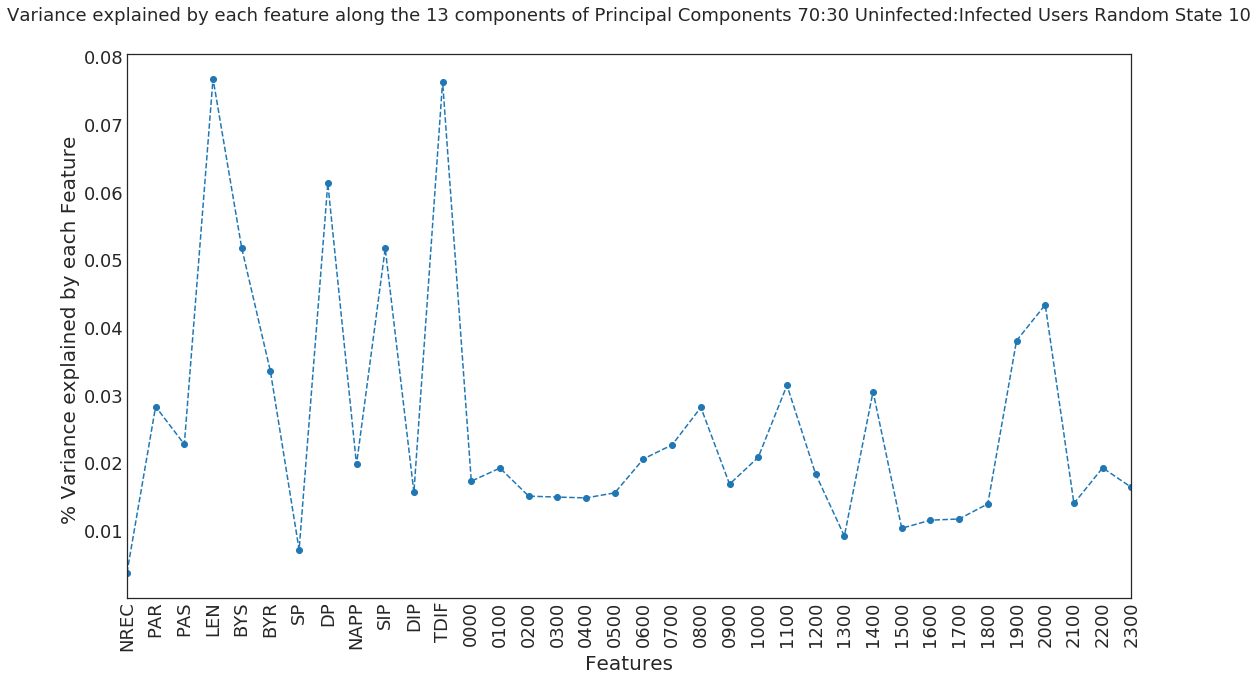

In [192]:
pca_inv_data = pca.components_

### Plot the variance explained by each feature for the decided number of components of PCA
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.title('Variance explained by each feature along the 13 components of Principal Components 70:30 Uninfected:Infected Users Random State 10',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('B.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

### For the rest of part 1,i.e. for 50:50 Infected and Uninfected Users split we apply Kmeans for differnet combinations of data which include scaled data, PCA with Scaled data using differnet number of components and analyze not only the sum of square of distances but also the cluster purity based on the ground truth.

### K-Means

Kmeans on data


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 3.86353957111e+15

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       2481.00    0.0
uninfected#     5786.00    3.0
infected%         30.01    0.0
uninfected%       69.99  100.0

Sum of square of distances is: 1.43803253982e+15

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       2434.00    0.0  47.00
uninfected#     5689.00    3.0  97.00
infected%         29.96    0.0  32.64
uninfected%       70.04  100.0  67.36

Sum of square of distances is: 9.4232838188e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2      3
infected#       2434.00    0.0  47.00    0.0
uninfected#     5688.00    3.0  97.00    1.0
infected%         29.97    0.0  32.64    0.0
uninfected%       70.03  100.0  67.36  100.0

Sum of square of distances is: 6.95385605904e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



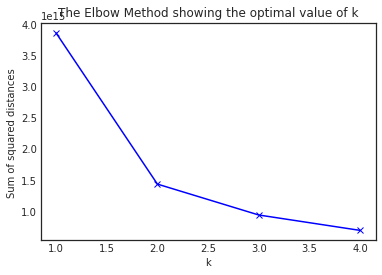

The minimum sum of sqaures of distances is : 6.95385605904e+14  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [193]:
print("Kmeans on data")
get_kmeans(X)

### K-Means on scaled data

Kmeans on scaled data


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 297720.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1390.00  1091.00
uninfected#      623.00  5166.00
infected%         69.05    17.44
uninfected%       30.95    82.56

Sum of square of distances is: 209636.764439

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1       2
infected#        801.00  1571.00  109.00
uninfected#     4913.00   855.00   21.00
infected%         14.02    64.76   83.85
uninfected%       85.98    35.24   16.15

Sum of square of distances is: 176604.010485

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1       2      3
infected#        800.00  1572.00  109.00    0.0
uninfected#     4907.00   855.00   21.00    6.0
infected%         14.02    64.77   83.85    0.0
uninfected%       85.98    35.23   16.15  100.0

Sum of square of distances is: 161034.907926

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



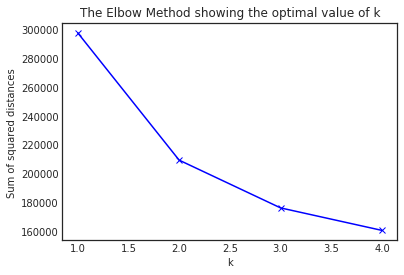

The minimum sum of sqaures of distances is : 161034.907926  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [194]:
print("Kmeans on scaled data")
get_kmeans(scaled_X)

### PCA using 3 components on scaled data

The explained variance for pca applied on scaled data is 0.677169357565 using 3 components
Kmeans on sclaed data with PCA using 3 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 24807.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       2481.00    0.0
uninfected#     5785.00    4.0
infected%         30.01    0.0
uninfected%       69.99  100.0

Sum of square of distances is: 19466.3737965

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#       1417.00  1064.00    0.0
uninfected#      666.00  5119.00    4.0
infected%         68.03    17.21    0.0
uninfected%       31.97    82.79  100.0

Sum of square of distances is: 14854.6452326

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1       2       3
infected#       1055.00    0.0  1250.0  176.00
uninfected#     5039.00    4.0   691.0   55.00
infected%         17.31    0.0    64.4   76.19
uninfected%       82.69  100.0    35.6   23.81

Sum of square of distances is: 11279.0799287

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



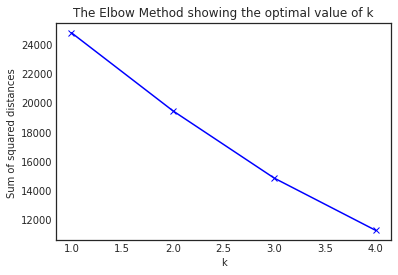

The minimum sum of sqaures of distances is : 11279.0799287  for k 4


In [195]:
pca=PCA(n_components=3,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 3 components")
print("Kmeans on sclaed data with PCA using 3 components:")
model=get_kmeans(X_pca_scaled)

### PCA on scaled data using 4 components

The explained variance for pca applied on scaled data is 0.719308226907 using 4 components
Kmeans on sclaed data with PCA using 4 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 33076.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       2481.00    0.0
uninfected#     5785.00    4.0
infected%         30.01    0.0
uninfected%       69.99  100.0

Sum of square of distances is: 27733.1355403

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2
infected#       1044.00    0.0  1437.00
uninfected#     5100.00    4.0   685.00
infected%         16.99    0.0    67.72
uninfected%       83.01  100.0    32.28

Sum of square of distances is: 23116.3242832

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2       3
infected#       1031.00  1256.00    0.0  194.00
uninfected#     4950.00   771.00    4.0   64.00
infected%         17.24    61.96    0.0   75.19
uninfected%       82.76    38.04  100.0   24.81

Sum of square of distances is: 19477.7471127

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



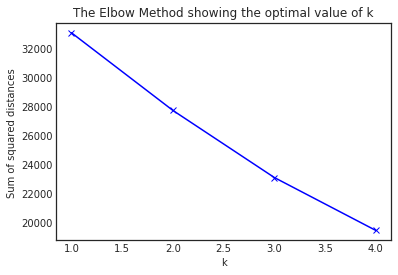

The minimum sum of sqaures of distances is : 19477.7471127  for k 4


In [196]:
### PCA on scaled data using 4 components
pca=PCA(n_components=4,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_4=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 4 components")
print("Kmeans on sclaed data with PCA using 4 components:")
model=get_kmeans(X_pca_scaled_4)

### PCA on scaled data using 5 components

The explained variance for pca applied on scaled data is 0.755637328197 using 5 components
Kmeans on sclaed data with PCA using 5 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 41345.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       2481.00    0.0
uninfected#     5785.00    4.0
infected%         30.01    0.0
uninfected%       69.99  100.0

Sum of square of distances is: 35993.3252615

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1      2
infected#       1739.0   742.00    0.0
uninfected#      974.0  4811.00    4.0
infected%         64.1    13.36    0.0
uninfected%       35.9    86.64  100.0

Sum of square of distances is: 31085.7795614

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1       2      3
infected#        542.00  1667.00  272.00    0.0
uninfected#     4285.00  1396.00  104.00    4.0
infected%         11.23    54.42   72.34    0.0
uninfected%       88.77    45.58   27.66  100.0

Sum of square of distances is: 27371.6305592

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



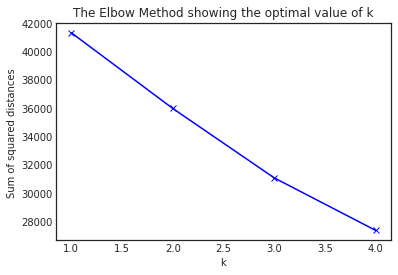

The minimum sum of sqaures of distances is : 27371.6305592  for k 4


In [197]:
### PCA on scaled data using 5 components
pca=PCA(n_components=5,whiten=True,random_state=0)
X_pca_scaled_5=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 5 components")
print("Kmeans on sclaed data with PCA using 5 components:")
model=get_kmeans(X_pca_scaled_5)

### PCA on scaled data using 6 components

The explained variance for pca applied on scaled data is 0.784266312144 using 6 components
Kmeans on sclaed data with PCA using 6 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 49614.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       2481.00    0.0
uninfected#     5782.00    7.0
infected%         30.03    0.0
uninfected%       69.97  100.0

Sum of square of distances is: 44389.8488329

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       2458.00  23.00    0.0
uninfected#     5766.00  19.00    4.0
infected%         29.89  54.76    0.0
uninfected%       70.11  45.24  100.0

Sum of square of distances is: 39554.287938

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1     2      3
infected#        504.00  1953.00   1.0  23.00
uninfected#     4362.00  1401.00   7.0  19.00
infected%         10.36    58.23  12.5  54.76
uninfected%       89.64    41.77  87.5  45.24

Sum of square of distances is: 35186.0801109

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



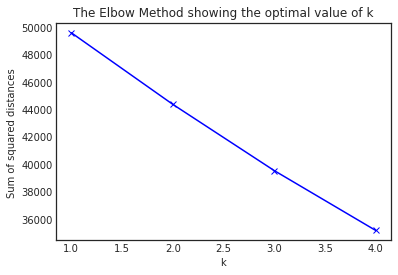

The minimum sum of sqaures of distances is : 35186.0801109  for k 4


In [198]:
### PCA on scaled data using 6 components
pca=PCA(n_components=6,whiten=True,random_state=0)
X_pca_scaled_6=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 6 components")
print("Kmeans on sclaed data with PCA using 6 components:")
model=get_kmeans(X_pca_scaled_6)

### PCA on scaled data using 9 components

The explained variance for pca applied on scaled data is 0.860007150237 using 9 components
Kmeans on sclaed data with PCA using 9 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 74421.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       2481.00    0.0
uninfected#     5784.00    5.0
infected%         30.02    0.0
uninfected%       69.98  100.0

Sum of square of distances is: 68532.9073918

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1        2
infected#       1985.0    0.0   496.00
uninfected#     1579.0    3.0  4207.00
infected%         55.7    0.0    10.55
uninfected%       44.3  100.0    89.45

Sum of square of distances is: 63150.6488531

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1      2      3
infected#       2137.00  344.00    0.0    0.0
uninfected#     5659.00  126.00    3.0    1.0
infected%         27.41   73.19    0.0    0.0
uninfected%       72.59   26.81  100.0  100.0

Sum of square of distances is: 58337.2246724

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



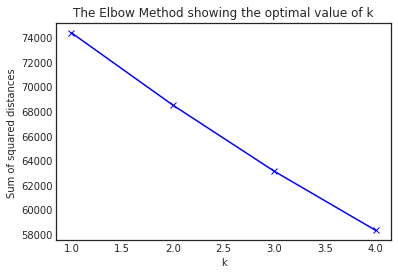

The minimum sum of sqaures of distances is : 58337.2246724  for k 4


In [199]:
### PCA on scaled data using 9 components
pca=PCA(n_components=9,whiten=True,random_state=0)
X_pca_scaled_9=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 9 components")
print("Kmeans on sclaed data with PCA using 9 components:")
model=get_kmeans(X_pca_scaled_9)

### PCA on scaled data using 11 components

The explained variance for pca applied on scaled data is 0.892824659917 using 11 components
Kmeans on sclaed data with PCA using 11 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 90959.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       2481.00    0.0
uninfected#     5784.00    5.0
infected%         30.02    0.0
uninfected%       69.98  100.0

Sum of square of distances is: 85068.7885878

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1      2
infected#        404.00  2077.0    0.0
uninfected#     3808.00  1980.0    1.0
infected%          9.59    51.2    0.0
uninfected%       90.41    48.8  100.0

Sum of square of distances is: 79398.7101333

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0     1        2      3
infected#        404.00   1.0  2076.00    0.0
uninfected#     3880.00   1.0  1905.00    3.0
infected%          9.43  50.0    52.15    0.0
uninfected%       90.57  50.0    47.85  100.0

Sum of square of distances is: 74533.090948

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



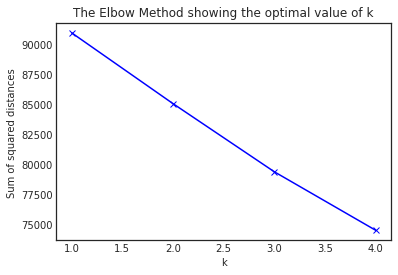

The minimum sum of sqaures of distances is : 74533.090948  for k 4


In [200]:
### PCA on scaled data using 11 components
pca=PCA(n_components=11,whiten=True,random_state=0)
X_pca_scaled_11=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 11 components")
print("Kmeans on sclaed data with PCA using 11 components:")
model=get_kmeans(X_pca_scaled_11)

### PCA on scaled data using 12 components

The explained variance for pca applied on scaled data is 0.905227258181 using 12 components
Kmeans on sclaed data with PCA using 12 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 99228.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       2481.00    0.0
uninfected#     5784.00    5.0
infected%         30.02    0.0
uninfected%       69.98  100.0

Sum of square of distances is: 93337.7353169

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1        2
infected#        402.0    0.0  2079.00
uninfected#     3873.0    3.0  1913.00
infected%          9.4    0.0    52.08
uninfected%       90.6  100.0    47.92

Sum of square of distances is: 87646.3190035

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2      3
infected#       2045.00   436.00    0.0    0.0
uninfected#     1922.00  3824.00   40.0    3.0
infected%         51.55    10.23    0.0    0.0
uninfected%       48.45    89.77  100.0  100.0

Sum of square of distances is: 82742.0170297

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



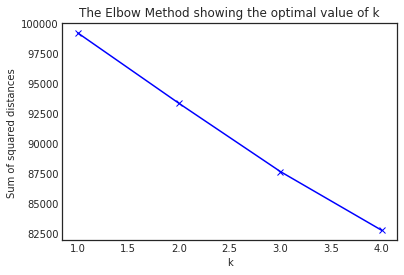

The minimum sum of sqaures of distances is : 82742.0170297  for k 4


In [201]:
### PCA on scaled data using 12 components
pca=PCA(n_components=12,whiten=True,random_state=0)
X_pca_scaled_12=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 12 components")
print("Kmeans on sclaed data with PCA using 12 components:")
model=get_kmeans(X_pca_scaled_12)

### PCA on scaled data using 13 components

The explained variance for pca applied on scaled data is 0.915617452326 using 13 components
Kmeans on sclaed data with PCA using 13 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 107497.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
infected#       2481.00    0.0
uninfected#     5784.00    5.0
infected%         30.02    0.0
uninfected%       69.98  100.0

Sum of square of distances is: 101606.740854

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#       2065.00   416.00    0.0
uninfected#     1965.00  3823.00    1.0
infected%         51.24     9.81    0.0
uninfected%       48.76    90.19  100.0

Sum of square of distances is: 95937.7377428

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1      2      3
infected#        416.00  2065.0    0.0    0.0
uninfected#     3825.00  1960.0    3.0    1.0
infected%          9.81    51.3    0.0    0.0
uninfected%       90.19    48.7  100.0  100.0

Sum of square of distances is: 90187.8699633

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



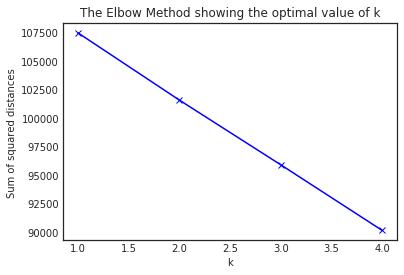

The minimum sum of sqaures of distances is : 90187.8699633  for k 4


In [202]:
### PCA on scaled data using 13 components
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_scaled_13=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 13 components")
print("Kmeans on sclaed data with PCA using 13 components:")
model=get_kmeans(X_pca_scaled_13)

### 2.3  <a id='2.3' style="text-decoration : none; color : #000000;"> Random State 20</a>

In [203]:
z=pd.read_csv('../Collecting logs and Building Feature Set/Feature_Vector_70_30_2_15_random_state_20.csv',index_col='Source_User')
print("Infected/Uninfected Users")
z.Target.value_counts()

Infected/Uninfected Users


uninfected    5789
infected      2481
Name: Target, dtype: int64

### Feature Set

In [204]:
### Build our feature set
X=z.iloc[:,z.columns!='Target']
X.head(2)

Count  Packets Received  \
Source_User                                                                   
b8517ecc923cf25374ba60a6da4f97be55f9f01896a2d64...    651         35.807988   
307c636564c5ec9897e5062605e2982daf781f0f82b0234...   4059        321.478197   

                                                    Packets Sent  \
Source_User                                                        
b8517ecc923cf25374ba60a6da4f97be55f9f01896a2d64...     35.328725   
307c636564c5ec9897e5062605e2982daf781f0f82b0234...    131.395910   

                                                    Elapsed_Time  \
Source_User                                                        
b8517ecc923cf25374ba60a6da4f97be55f9f01896a2d64...    108.442396   
307c636564c5ec9897e5062605e2982daf781f0f82b0234...     73.695245   

                                                      Bytes_sent  \
Source_User                                                        
b8517ecc923cf25374ba60a6da4f97be55f9f01896a2d64...   3976.233487   
307c636564c5ec9897e5062605e2982daf781f0f82b0234...  31586.025868   

                                                    Bytes_received  \
Source_User                                                          
b8517ecc923cf25374ba60a6da4f97be55f9f01896a2d64...    37072.858679   
307c636564c5ec9897e5062605e2982daf781f0f82b0234...   413326.700419   

                                                    Source_Port  \
Source_User                                                       
b8517ecc923cf25374ba60a6da4f97be55f9f01896a2d64...        639.0   
307c636564c5ec9897e5062605e2982daf781f0f82b0234...       3627.0   

                                                    Destination_Port  \
Source_User                                                            
b8517ecc923cf25374ba60a6da4f97be55f9f01896a2d64...               8.0   
307c636564c5ec9897e5062605e2982daf781f0f82b0234...              18.0   

                                                    Application  Source_IP  \
Source_User                                                                  
b8517ecc923cf25374ba60a6da4f97be55f9f01896a2d64...           21         23   
307c636564c5ec9897e5062605e2982daf781f0f82b0234...           40         31   

                                                    Destination_IP  \
Source_User                                                          
b8517ecc923cf25374ba60a6da4f97be55f9f01896a2d64...             158   
307c636564c5ec9897e5062605e2982daf781f0f82b0234...             974   

                                                    Received_Time_diff    0  \
Source_User                                                                   
b8517ecc923cf25374ba60a6da4f97be55f9f01896a2d64...        11131.820276    6   
307c636564c5ec9897e5062605e2982daf781f0f82b0234...         1803.300813  196   

                                                      1    2    3    4    5  \
Source_User                                                                   
b8517ecc923cf25374ba60a6da4f97be55f9f01896a2d64...    0    2    0    0    0   
307c636564c5ec9897e5062605e2982daf781f0f82b0234...  310  532  308  202  101   

                                                     6    7   8   9  10  11  \
Source_User                                                                   
b8517ecc923cf25374ba60a6da4f97be55f9f01896a2d64...   0   13   8  34  95  39   
307c636564c5ec9897e5062605e2982daf781f0f82b0234...  45  281  95  38  93  95   

                                                     12   13   14  15   16  \
Source_User                                                                  
b8517ecc923cf25374ba60a6da4f97be55f9f01896a2d64...   76   71   74  66  114   
307c636564c5ec9897e5062605e2982daf781f0f82b0234...  206  102  104  84  194   

                                                     17   18   19   20   21  \
Source_User                                                                   
b8517ecc923cf25374ba60a6da4f97be55f9f01896a2d64...   27   14 

In [205]:
### Store the labels ['Infected','Uninfected'] in a separate frame to analyze the clusters later
target=z.Target.reset_index(drop=True)

### Scaled X

In [206]:
### Retain the original data and column names
orig_X=X.copy()
## Create a new feature set and scale it using Standard Scaler
X=X.values
scaler_X=StandardScaler()
scaler_X.fit(X)
scaled_X=scaler_X.transform(X)
scaled_X[0:2]

array([[ -5.19002133e-01,  -7.00263446e-02,  -3.83373866e-02,
          2.60031974e-02,  -4.81706583e-02,  -7.90570145e-02,
         -5.91994140e-01,  -9.26698452e-02,  -5.38598509e-01,
         -6.73241214e-01,  -5.57806394e-01,  -1.27712683e-01,
         -5.04180272e-01,  -4.85602596e-01,  -4.56722056e-01,
         -4.40562397e-01,  -4.25604804e-01,  -4.20362665e-01,
         -4.18655945e-01,  -4.16953846e-01,  -5.01514343e-01,
         -4.34756746e-01,  -5.03721225e-02,  -4.14161081e-01,
         -2.01869893e-01,  -2.38192109e-01,  -1.96808477e-01,
         -1.54938241e-01,   2.62386177e-04,  -4.63639228e-01,
         -5.27749788e-01,  -5.70143570e-01,  -5.76055542e-01,
         -5.20620487e-01,  -4.95339071e-01,  -5.35644886e-01],
       [  2.80822192e-01,   8.59563778e-02,   3.06360230e-02,
         -1.85536038e-01,   2.21529306e-02,   1.11149758e-01,
          4.62375061e-01,  -6.06953946e-02,   5.20613542e-01,
         -4.57732102e-01,   4.48388620e-01,  -2.89284234e-01,
       

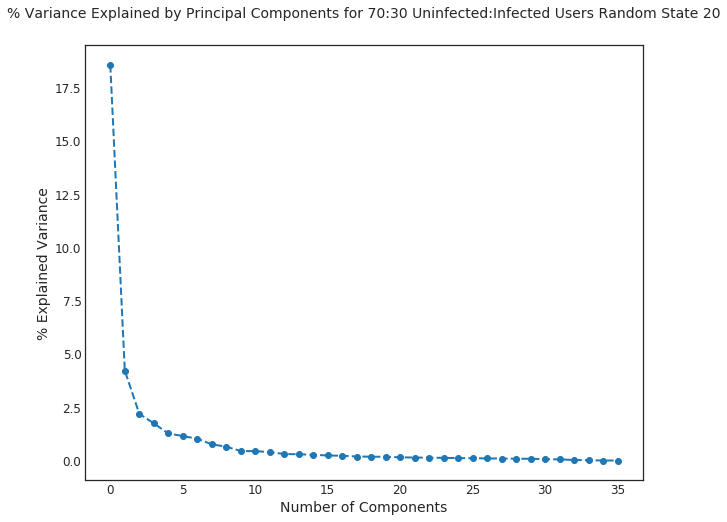

In [207]:
### Plot the scree plot to analyze the number of components to be selected for PCA

sns.set_style('white')
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components for 70:30 Uninfected:Infected Users Random State 20',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


In [208]:
pca_explained_variance_70_20=pca.explained_variance_

In [209]:
### Analyze how each of the origunal component contributes to explain the variance using the decided number of components
pca=PCA(n_components=13,random_state=0)
X_pca1_13=pca.fit_transform(scaled_X)
print("Table for components of PCA when using 13 components with explained variance of",sum(pca.explained_variance_ratio_))
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12','PC-13'])
m

Table for components of PCA when using 13 components with explained variance of 0.920535156414


Count  Packets Received  Packets Sent  Elapsed_Time  Bytes_sent  \
PC-1   0.230775          0.000742     -0.001346     -0.006791   -0.003026   
PC-2   0.002088          0.476561      0.481164      0.389455    0.408874   
PC-3  -0.039806          0.019650      0.021213     -0.029623    0.018366   
PC-4   0.034826         -0.007081     -0.007880      0.007409   -0.005678   
PC-5   0.043707         -0.023091     -0.017926      0.072704   -0.012755   
PC-6   0.003670          0.022410      0.017500     -0.070653    0.011415   
PC-7  -0.053628         -0.023125     -0.024814      0.103693   -0.037136   
PC-8  -0.024627         -0.000060     -0.000021      0.009207    0.003172   
PC-9   0.014874          0.008249      0.010820     -0.054472    0.022253   
PC-10 -0.004430          0.014778      0.107479     -0.765029    0.607256   
PC-11  0.000202         -0.002269     -0.003139      0.037940   -0.024129   
PC-12 -0.000192         -0.007287      0.002633     -0.030415    0.047112   
PC-13  0.011115         -0.339102     -0.132604      0.443287    0.618188   

       Bytes_received  Source_Port  Destination_Port  Application  Source_IP  \
PC-1         0.001586     0.220102          0.072753     0.181684   0.115899   
PC-2         0.470708    -0.000185          0.015388    -0.009560  -0.010789   
PC-3         0.019031    -0.028575         -0.205765     0.084233   0.135530   
PC-4        -0.006777    -0.056078         -0.045558    -0.110371  -0.196703   
PC-5        -0.025194    -0.072120          0.299797    -0.262177  -0.322949   
PC-6         0.024393     0.087725         -0.181107     0.246685   0.347574   
PC-7        -0.021989    -0.078883          0.774705     0.067556   0.122876   
PC-8         0.000031     0.088444         -0.000773     0.248431   0.489754   
PC-9         0.006771     0.036407         -0.164476    -0.119498  -0.397550   
PC-10       -0.025074    -0.028710          0.124433     0.022383  -0.032790   
PC-11       -0.001560    -0.074633         -0.036987    -0.031770   0.102764   
PC-12       -0.011647     0.030578          0.085750     0.003097  -0.053634   
PC-13       -0.422403    -0.029962         -0.045879    -0.135140   0.125534   

       Destination_IP  Received_Time_diff         0         1         2  \
PC-1         0.205821           -0.051657  0.198797  0.183602  0.180430   
PC-2         0.006664            0.003643  0.003715  0.005177  0.007377   
PC-3        -0.096098           -0.069415 -0.059770 -0.174303 -0.268592   
PC-4        -0.049581            0.119303  0.212499  0.221000  0.209189   
PC-5         0.038443            0.323493 -0.147464 -0.150200 -0.095664   
PC-6        -0.036094           -0.515561 -0.049044  0.031649  0.074089   
PC-7         0.350386           -0.290906 -0.014251 -0.024519 -0.021434   
PC-8         0.077037            0.699066  0.032240  0.098573  0.082697   
PC-9        -0.088380           -0.153102  0.045533  0.153486  0.152341   
PC-10        0.049223            0.046373 -0.035911 -0.052352 -0.024404   
PC-11       -0.080569            0.013315 -0.262189 -0.313713 -0.111493   
PC-12        0.030071           -0.001624  0.101836  0.179333  0.112544   
PC-13       -0.056802           -0.054894  0.093771  0.103087 -0.027307   

              3         4         5         6         7         8         9  \
PC-1   0.172545  0.171876  0.169693  0.159636  0.161590  0.163717  0.180728   
PC-2   0.008147  0.008790  0.007598  0.005012  0.000882 -0.002231 -0.003413   
PC-3  -0.353390 -0.374220 -0.351932 -0.291035 -0.131628 -0.003458  0.100935   
PC-4   0.119133  0.033739 -0.076648 -0.225271 -0.344859 -0.381883 -0.295110   
PC-5  -0.024246  0.048276  0.100564  0.149828  0.156610  0.106009  0.043998   
PC-6   0.116421  0.112276  0.099874  0.074081 -0.013763 -0.064816 -0.114558   
PC-7  -0.021050 -0.050232 -0.104644 -0.180400 -0.195779 -0.185056 -0.066899   
PC-8   0.082446  0.023095 -0.022781 -0.100069 -0.156606 -0.124508 -0.042151   
PC-9   0.173149  0.089363  0.023195 -0.129264 -0

In [210]:
pca_inv_data_70_20=pca.components_
pca_data_70_20=m

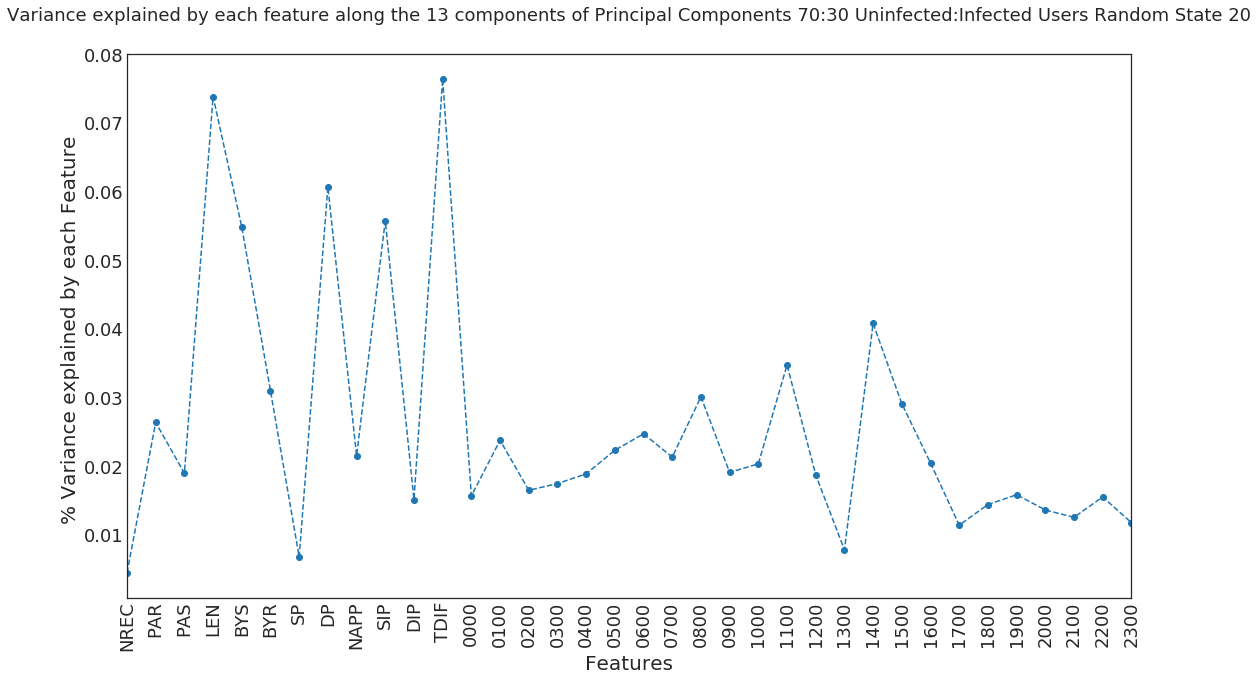

In [211]:
pca_inv_data = pca.components_

### Plot the variance explained by each feature for the decided number of components of PCA
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.title('Variance explained by each feature along the 13 components of Principal Components 70:30 Uninfected:Infected Users Random State 20',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('B.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

### For the rest of part 1,i.e. for 50:50 Infected and Uninfected Users split we apply Kmeans for differnet combinations of data which include scaled data, PCA with Scaled data using differnet number of components and analyze not only the sum of square of distances but also the cluster purity based on the ground truth.

### K-Means

Kmeans on data


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 3.36631255625e+16

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1
infected#       2481.0    0.0
uninfected#     5788.0    1.0
infected%         30.0    0.0
uninfected%       70.0  100.0

Sum of square of distances is: 2.58733596452e+15

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       2481.00    0.0    0.0
uninfected#     5784.00    1.0    4.0
infected%         30.02    0.0    0.0
uninfected%       69.98  100.0  100.0

Sum of square of distances is: 1.53130204715e+15

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2      3
infected#       2481.00    0.0    0.0    0.0
uninfected#     5782.00    1.0    4.0    2.0
infected%         30.03    0.0    0.0    0.0
uninfected%       69.97  100.0  100.0  100.0

Sum of square of distances is: 1.0175602244e+15

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



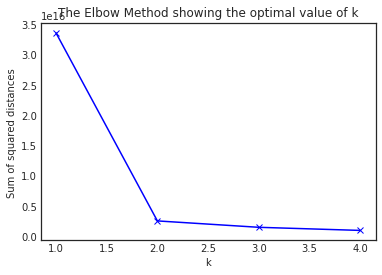

The minimum sum of sqaures of distances is : 1.0175602244e+15  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [212]:
print("Kmeans on data")
get_kmeans(X)

### K-Means on scaled data

Kmeans on scaled data


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 297720.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1
infected#       1081.00  1400.00
uninfected#     5175.00   614.00
infected%         17.28    69.51
uninfected%       82.72    30.49

Sum of square of distances is: 208528.997766

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#       1081.00  1400.00    0.0
uninfected#     5174.00   614.00    1.0
infected%         17.28    69.51    0.0
uninfected%       82.72    30.49  100.0

Sum of square of distances is: 175895.426655

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2       3
infected#       1551.00   769.00    0.0  161.00
uninfected#      871.00  4889.00    1.0   28.00
infected%         64.04    13.59    0.0   85.19
uninfected%       35.96    86.41  100.0   14.81

Sum of square of distances is: 147037.327117

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



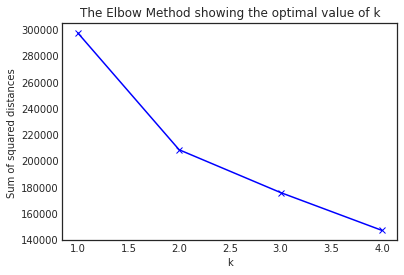

The minimum sum of sqaures of distances is : 147037.327117  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [213]:
print("Kmeans on scaled data")
get_kmeans(scaled_X)

### PCA using 3 components on scaled data

The explained variance for pca applied on scaled data is 0.693227686823 using 3 components
Kmeans on sclaed data with PCA using 3 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 24807.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1
infected#       2481.0    0.0
uninfected#     5788.0    1.0
infected%         30.0    0.0
uninfected%       70.0  100.0

Sum of square of distances is: 17088.9170835

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2
infected#       1104.00    0.0  1377.00
uninfected#     5188.00    1.0   600.00
infected%         17.55    0.0    69.65
uninfected%       82.45  100.0    30.35

Sum of square of distances is: 12301.2994963

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2       3
infected#       1192.00  1085.00    0.0  204.00
uninfected#      627.00  5089.00    1.0   72.00
infected%         65.53    17.57    0.0   73.91
uninfected%       34.47    82.43  100.0   26.09

Sum of square of distances is: 8705.69588034

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



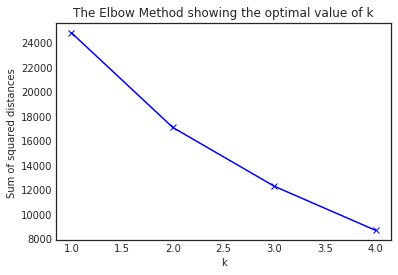

The minimum sum of sqaures of distances is : 8705.69588034  for k 4


In [214]:
pca=PCA(n_components=3,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 3 components")
print("Kmeans on sclaed data with PCA using 3 components:")
model=get_kmeans(X_pca_scaled)

### PCA on scaled data using 4 components

The explained variance for pca applied on scaled data is 0.741701092107 using 4 components
Kmeans on sclaed data with PCA using 4 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 33076.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1
infected#       2481.0    0.0
uninfected#     5788.0    1.0
infected%         30.0    0.0
uninfected%       70.0  100.0

Sum of square of distances is: 25356.8449556

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2
infected#       1381.00    0.0  1100.00
uninfected#      616.00    1.0  5172.00
infected%         69.15    0.0    17.54
uninfected%       30.85  100.0    82.46

Sum of square of distances is: 20548.1033102

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1      2        3
infected#       1069.00  267.00    0.0  1145.00
uninfected#     4993.00   88.00    1.0   707.00
infected%         17.63   75.21    0.0    61.83
uninfected%       82.37   24.79  100.0    38.17

Sum of square of distances is: 16800.3101181

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



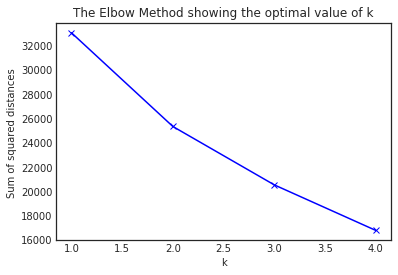

The minimum sum of sqaures of distances is : 16800.3101181  for k 4


In [215]:
### PCA on scaled data using 4 components
pca=PCA(n_components=4,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_4=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 4 components")
print("Kmeans on sclaed data with PCA using 4 components:")
model=get_kmeans(X_pca_scaled_4)

### PCA on scaled data using 5 components

The explained variance for pca applied on scaled data is 0.776960923103 using 5 components
Kmeans on sclaed data with PCA using 5 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 41345.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1
infected#       2481.0    0.0
uninfected#     5788.0    1.0
infected%         30.0    0.0
uninfected%       70.0  100.0

Sum of square of distances is: 33624.1267371

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1      2
infected#        871.0  1610.00    0.0
uninfected#     4973.0   815.00    1.0
infected%         14.9    66.39    0.0
uninfected%       85.1    33.61  100.0

Sum of square of distances is: 28628.4938916

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2     3
infected#        870.00  1610.00    0.0   1.0
uninfected#     4980.00   807.00    1.0   1.0
infected%         14.87    66.61    0.0  50.0
uninfected%       85.13    33.39  100.0  50.0

Sum of square of distances is: 23839.8523733

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



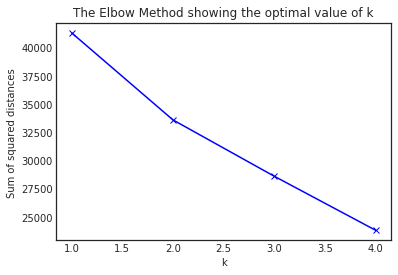

The minimum sum of sqaures of distances is : 23839.8523733  for k 4


In [216]:
### PCA on scaled data using 5 components
pca=PCA(n_components=5,whiten=True,random_state=0)
X_pca_scaled_5=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 5 components")
print("Kmeans on sclaed data with PCA using 5 components:")
model=get_kmeans(X_pca_scaled_5)

### PCA on scaled data using 6 components

The explained variance for pca applied on scaled data is 0.808851833241 using 6 components
Kmeans on sclaed data with PCA using 6 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 49614.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1
infected#       2481.0    0.0
uninfected#     5788.0    1.0
infected%         30.0    0.0
uninfected%       70.0  100.0

Sum of square of distances is: 41891.3332825

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       2481.00    0.0    0.0
uninfected#     5787.00    1.0    1.0
infected%         30.01    0.0    0.0
uninfected%       69.99  100.0  100.0

Sum of square of distances is: 34831.9147925

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2      3
infected#       1807.00   674.00    0.0    0.0
uninfected#     1056.00  4731.00    1.0    1.0
infected%         63.12    12.47    0.0    0.0
uninfected%       36.88    87.53  100.0  100.0

Sum of square of distances is: 29735.1157677

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



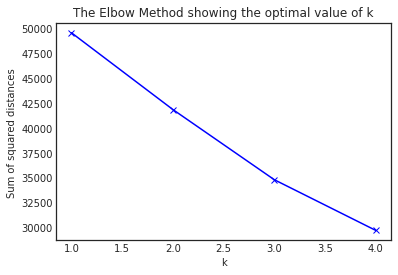

The minimum sum of sqaures of distances is : 29735.1157677  for k 4


In [217]:
### PCA on scaled data using 6 components
pca=PCA(n_components=6,whiten=True,random_state=0)
X_pca_scaled_6=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 6 components")
print("Kmeans on sclaed data with PCA using 6 components:")
model=get_kmeans(X_pca_scaled_6)

### PCA on scaled data using 9 components

The explained variance for pca applied on scaled data is 0.876469591303 using 9 components
Kmeans on sclaed data with PCA using 9 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 74421.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1
infected#       2481.0    0.0
uninfected#     5788.0    1.0
infected%         30.0    0.0
uninfected%       70.0  100.0

Sum of square of distances is: 66694.4324999

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       2481.00    0.0    0.0
uninfected#     5787.00    1.0    1.0
infected%         30.01    0.0    0.0
uninfected%       69.99  100.0  100.0

Sum of square of distances is: 59532.0466676

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2      3
infected#       2063.00    0.0   418.00    0.0
uninfected#     1910.00    1.0  3877.00    1.0
infected%         51.93    0.0     9.73    0.0
uninfected%       48.07  100.0    90.27  100.0

Sum of square of distances is: 53722.0809748

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



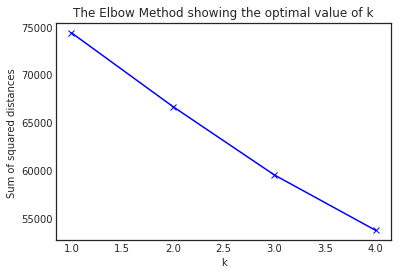

The minimum sum of sqaures of distances is : 53722.0809748  for k 4


In [218]:
### PCA on scaled data using 9 components
pca=PCA(n_components=9,whiten=True,random_state=0)
X_pca_scaled_9=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 9 components")
print("Kmeans on sclaed data with PCA using 9 components:")
model=get_kmeans(X_pca_scaled_9)

### PCA on scaled data using 11 components

The explained variance for pca applied on scaled data is 0.901080089025 using 11 components
Kmeans on sclaed data with PCA using 11 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 90959.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1
infected#       2481.0    0.0
uninfected#     5788.0    1.0
infected%         30.0    0.0
uninfected%       70.0  100.0

Sum of square of distances is: 83226.8395759

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
infected#       2481.00    0.0    0.0
uninfected#     5787.00    1.0    1.0
infected%         30.01    0.0    0.0
uninfected%       69.99  100.0  100.0

Sum of square of distances is: 75870.4554513

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1        2      3
infected#       2060.00    0.0   421.00    0.0
uninfected#     1920.00    1.0  3867.00    1.0
infected%         51.76    0.0     9.82    0.0
uninfected%       48.24  100.0    90.18  100.0

Sum of square of distances is: 70055.8471622

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



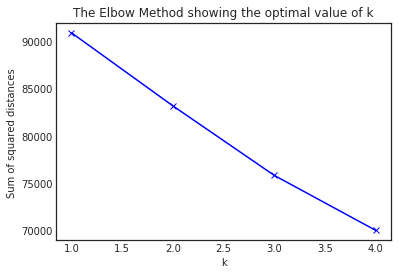

The minimum sum of sqaures of distances is : 70055.8471622  for k 4


In [219]:
### PCA on scaled data using 11 components
pca=PCA(n_components=11,whiten=True,random_state=0)
X_pca_scaled_11=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 11 components")
print("Kmeans on sclaed data with PCA using 11 components:")
model=get_kmeans(X_pca_scaled_11)

### PCA on scaled data using 12 components

The explained variance for pca applied on scaled data is 0.912081371931 using 12 components
Kmeans on sclaed data with PCA using 12 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 99228.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1
infected#       2481.0    0.0
uninfected#     5788.0    1.0
infected%         30.0    0.0
uninfected%       70.0  100.0

Sum of square of distances is: 91495.6477979

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#        423.00  2058.00    0.0
uninfected#     3852.00  1936.00    1.0
infected%          9.89    51.53    0.0
uninfected%       90.11    48.47  100.0

Sum of square of distances is: 85687.4387954

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1      2      3
infected#       2211.00  270.00    0.0    0.0
uninfected#     5693.00   94.00    1.0    1.0
infected%         27.97   74.18    0.0    0.0
uninfected%       72.03   25.82  100.0  100.0

Sum of square of distances is: 79246.5166738

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



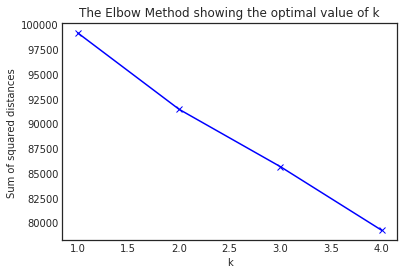

The minimum sum of sqaures of distances is : 79246.5166738  for k 4


In [220]:
### PCA on scaled data using 12 components
pca=PCA(n_components=12,whiten=True,random_state=0)
X_pca_scaled_12=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 12 components")
print("Kmeans on sclaed data with PCA using 12 components:")
model=get_kmeans(X_pca_scaled_12)

### PCA on scaled data using 13 components

The explained variance for pca applied on scaled data is 0.920535156414 using 13 components
Kmeans on sclaed data with PCA using 13 components:


Cluster_Labels       0
infected#       2481.0
uninfected#     5789.0
infected%         30.0
uninfected%       70.0

Sum of square of distances is: 107497.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1
infected#       2481.0    0.0
uninfected#     5788.0    1.0
infected%         30.0    0.0
uninfected%       70.0  100.0

Sum of square of distances is: 100114.617412

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2
infected#        421.00  2060.00    0.0
uninfected#     3855.00  1933.00    1.0
infected%          9.85    51.59    0.0
uninfected%       90.15    48.41  100.0

Sum of square of distances is: 93738.4025114

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2      3
infected#       1786.00  695.0    0.0    0.0
uninfected#     5492.00  295.0    1.0    1.0
infected%         24.54   70.2    0.0    0.0
uninfected%       75.46   29.8  100.0  100.0

Sum of square of distances is: 87065.2108765

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



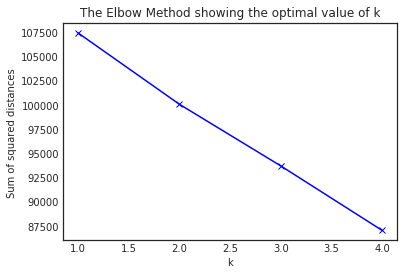

The minimum sum of sqaures of distances is : 87065.2108765  for k 4


In [221]:
### PCA on scaled data using 13 components
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_scaled_13=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 13 components")
print("Kmeans on sclaed data with PCA using 13 components:")
model=get_kmeans(X_pca_scaled_13)

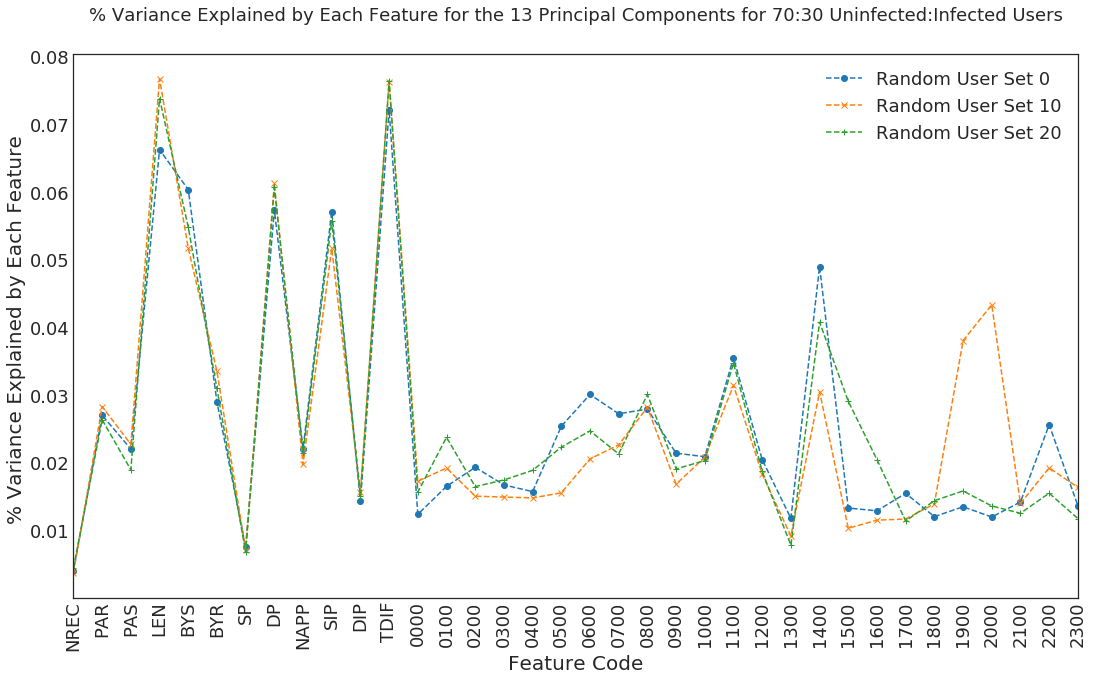

In [222]:
sns.set_style('white')
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data_70_0.std(axis=0)), '--o', label = 'Random User Set 0')
plt.plot(np.square(pca_inv_data_70_10.std(axis=0)), '--x', label = 'Random User Set 10')
plt.plot(np.square(pca_inv_data_70_20.std(axis=0)), '--+', label = 'Random User Set 20')
plt.legend(loc='lower right')
plt.ylabel('% Variance Explained by Each Feature ', fontsize=20)
plt.xlabel('Feature Code', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.title('% Variance Explained by Each Feature for the 13 Principal Components for 70:30 Uninfected:Infected Users',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
### Comment to save the plot
# plt.savefig('E2.jpeg', dpi=1200)
plt.show()

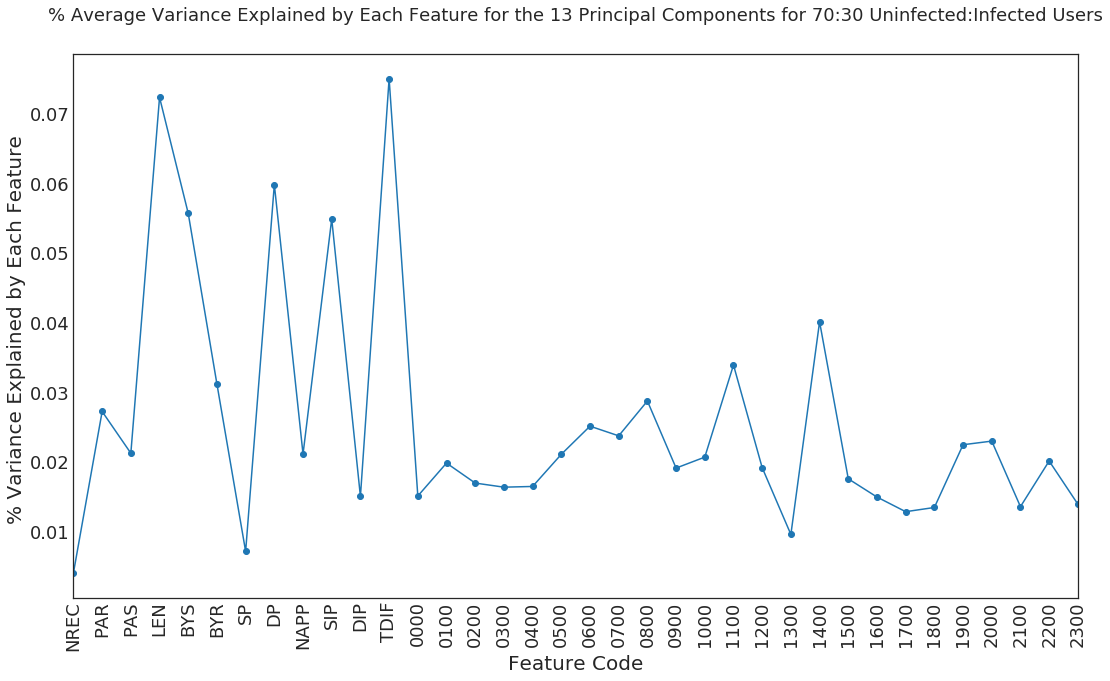

In [223]:
avg_variance_70=np.square(pca_inv_data_70_0.std(axis=0))+np.square(pca_inv_data_70_10.std(axis=0))+np.square(pca_inv_data_70_20.std(axis=0))

avg_variance_70=avg_variance_70/3

sns.set_style('white')
fig = plt.figure(figsize=(18, 10))
plt.plot(avg_variance_70, '-o')
plt.legend(loc='lower right')
plt.ylabel('% Variance Explained by Each Feature ', fontsize=20)
plt.xlabel('Feature Code', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.title('% Average Variance Explained by Each Feature for the 13 Principal Components for 70:30 Uninfected:Infected Users',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
### Comment to save the plot
# plt.savefig('E2.jpeg', dpi=1200)
plt.show()

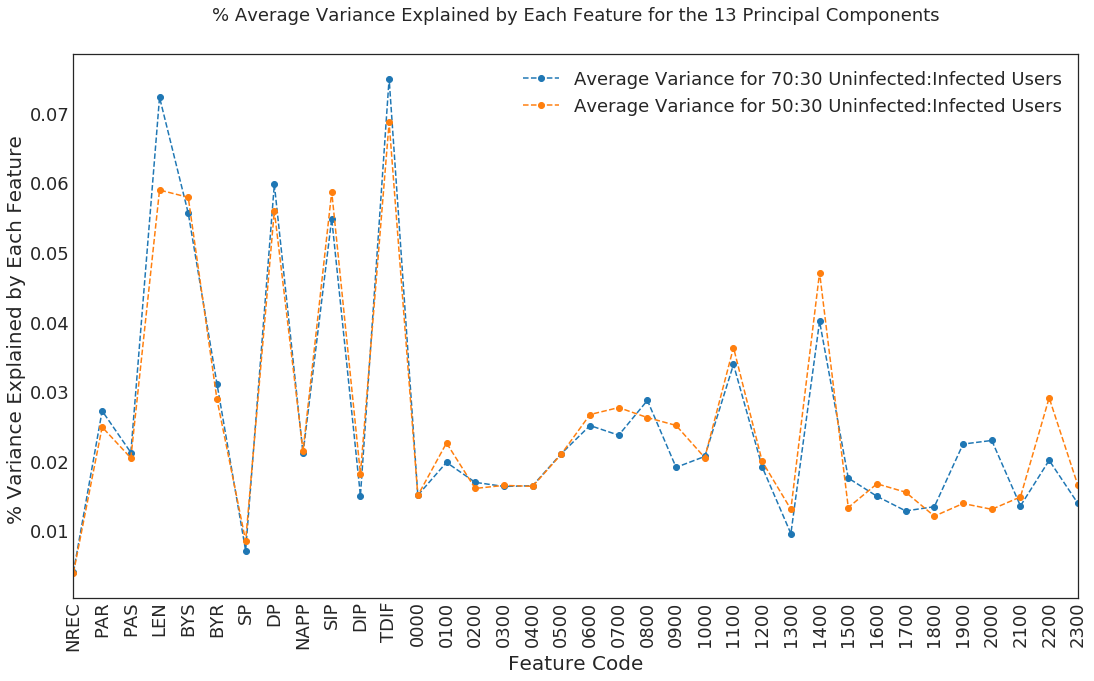

In [224]:
sns.set_style('white')
fig = plt.figure(figsize=(18, 10))
plt.plot(avg_variance_70, '--o', label = 'Average Variance for 70:30 Uninfected:Infected Users')
plt.plot(avg_variance_50, '--o', label = 'Average Variance for 50:30 Uninfected:Infected Users')
plt.legend(loc='lower right')
plt.ylabel('% Variance Explained by Each Feature ', fontsize=20)
plt.xlabel('Feature Code', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.title('% Average Variance Explained by Each Feature for the 13 Principal Components',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
### Comment to save the plot
# plt.savefig('E2.jpeg', dpi=1200)
plt.show()

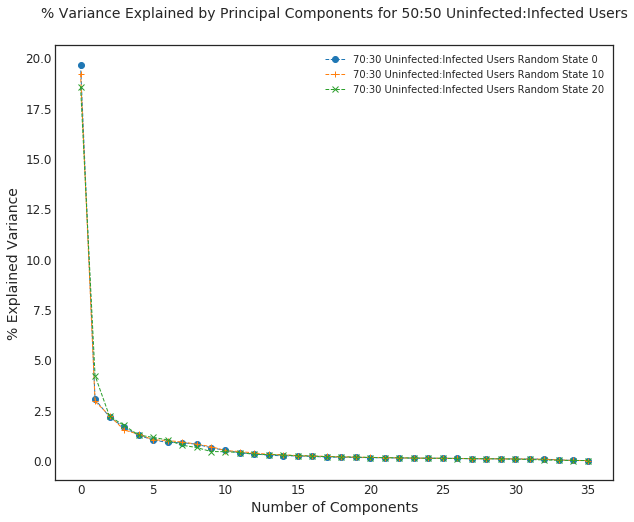

In [225]:
### Plot the scree plot to analyze the number of components to be selected for PCA

sns.set_style('white')
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca_explained_variance_70_0, '--o', linewidth=1,alpha=1,label='70:30 Uninfected:Infected Users Random State 0')
plt.plot(pca_explained_variance_70_10,'--+', linewidth=1,alpha=1,label='70:30 Uninfected:Infected Users Random State 10')
plt.plot(pca_explained_variance_70_20,'--x', linewidth=1,alpha=1,label='70:30 Uninfected:Infected Users Random State 20')
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components for 50:50 Uninfected:Infected Users',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


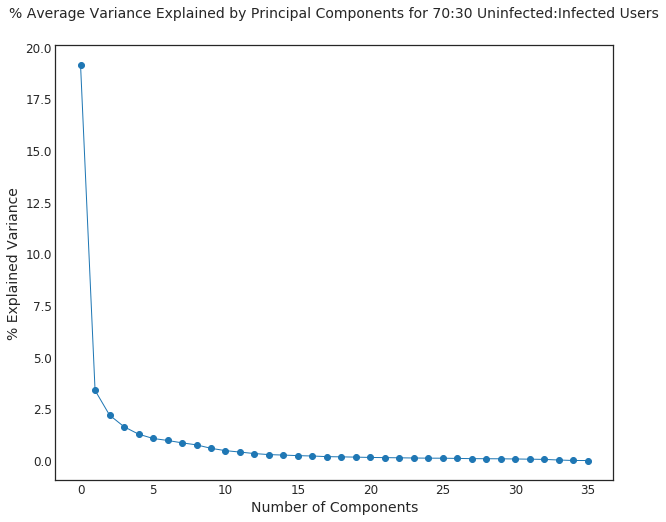

In [226]:
pca_explained_variance_70_avg=pca_explained_variance_70_0+pca_explained_variance_70_10+pca_explained_variance_70_20
pca_explained_variance_70_avg=pca_explained_variance_70_avg/3
sns.set_style('white')

plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca_explained_variance_70_avg, '-o', linewidth=1,alpha=1)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Average Variance Explained by Principal Components for 70:30 Uninfected:Infected Users',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()

In [227]:
### Original Creator : Darshan Bhansali
### HTML code to hide the input cells 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')